In [1]:
%matplotlib inline

# Import custom scripts

In [2]:
path_scripts = '/mnt/kauffman/joosts/projects/STRT_epidermis/scripts'

In [3]:
import sys
sys.path.append(path_scripts)

In [4]:
from EPI_misc_scripts_v1_1 import *
from EPI_affinity_propagation_v1_0 import *
from EPI_neg_binom_regression_v1_1 import *
from EPI_pseudotemporal_ordering_v1_0 import *
from EPI_gene_neighbor_network_v1_0 import *

Couldn't import dot_parser, loading of dot files will not be possible.


In [5]:
import matplotlib as mpl

# Initialize engines

In [6]:
from ipyparallel import Client

In [7]:
c = Client(profile='default')

In [8]:
dview = c[:]

In [9]:
dview.execute('import sys')
dview.execute('sys.path.append("/mnt/kauffman/joosts/projects/STRT_epidermis/scripts")')
dview.execute('from EPI_misc_scripts_v1_1 import *')
dview.execute('from EPI_affinity_propagation_v1_0 import *')
dview.execute('from EPI_neg_binom_regression_v1_1 import *')
dview.execute('from EPI_pseudotemporal_ordering_v1_0 import *')
dview.execute('from EPI_gene_neighbor_network_v1_0 import *')

<AsyncResult: finished>

# Import Data

In [10]:
exp_id = '201509151726'
path_input = '/mnt/kauffman/joosts/projects/STRT_epidermis/data_input/v1.8'
path_output = '/mnt/kauffman/joosts/projects/STRT_epidermis/data_output/v1.8'
path_figures = '/mnt/kauffman/joosts/projects/STRT_epidermis/figures/v1.8'

In [11]:
seq = loadData_v1(path_input, exp_id, 'seq', 'DataFrame')
meta = loadData_v1(path_input, exp_id, 'meta', 'DataFrame')

In [12]:
s_groups_1st = loadData_v1(path_output, exp_id, 's_groups_1st', 'Series')
g_groups_1st = loadData_v1(path_output, exp_id, 'g_groups_1st', 'Series')

In [13]:
s_groups_IFE_b = loadData_v1(path_output, exp_id, 's_groups_IFE_b', 'Series')
g_groups_IFE_b = loadData_v1(path_output, exp_id, 'g_groups_IFE_b', 'Series')

In [14]:
s_groups_uHF = loadData_v1(path_output, exp_id, 's_groups_uHF', 'Series')
g_groups_uHF = loadData_v1(path_output, exp_id, 'g_groups_uHF', 'Series')

In [15]:
s_groups_OB = loadData_v1(path_output, exp_id, 's_groups_OB', 'Series')
g_groups_OB = loadData_v1(path_output, exp_id, 'g_groups_OB', 'Series')

In [16]:
s_groups_IB = loadData_v1(path_output, exp_id, 's_groups_IB', 'Series')
g_groups_IB = loadData_v1(path_output, exp_id, 'g_groups_IB', 'Series')

In [17]:
s_groups_2nd = loadData_v1(path_output, exp_id, 's_groups_2nd', 'Series')

In [18]:
tsne_1st = loadData_v1(path_output, exp_id, 'tsne_1st', 'DataFrame')

In [19]:
tsne_spatial = loadData_v1(path_output, exp_id, 'tsne_spatial','DataFrame')

In [20]:
PTO_coords_IFE = loadData_v1(path_output, exp_id, 'PTO_coords_IFE', 'Series')
PTO_coords_spatial = loadData_v1(path_output, exp_id, 'PTO_coords_spatial', 'Series')

In [21]:
spatial_fitted = loadData_v1(path_output, exp_id, 'spatial_fitted', 'DataFrame')
spatial_stats = loadData_v1(path_output, exp_id, 'spatial_stats', 'DataFrame')

In [22]:
IFE_corr_max = loadData_v1(path_output, exp_id, 'IFE_corr_max', 'Series')
pseudospace_corr_max = loadData_v1(path_output, exp_id, 'pseudospace_corr_max', 'Series')

In [23]:
g_groups_spatial = loadData_v1(path_output, exp_id, 'g_groups_spatial', 'Series')

In [24]:
g_groups_IFE = loadData_v1(path_output, exp_id, 'g_groups_IFE', 'Series')

In [25]:
PTO_coords_spatial_multi = loadData_v1(path_output, exp_id, 'PTO_coords_spatial_multi', 'Series')
PTO_coords_spatial_tSNE_it = loadData_v1(path_output, exp_id, 'PTO_coords_spatial_tSNE_it', 'DataFrame')
PTO_coords_spatial_tSNE_res = loadData_v1(path_output, exp_id, 'PTO_coords_spatial_tSNE_res', 'DataFrame')
PTO_coords_spatial_tSNE_shf = loadData_v1(path_output, exp_id, 'PTO_coords_spatial_tSNE_shf', 'DataFrame')

In [26]:
IFE_fitted = loadData_v1(path_output, exp_id, 'IFE_fitted', 'DataFrame')
IFE_stats = loadData_v1(path_output, exp_id, 'IFE_stats', 'DataFrame')

In [27]:
NBR_2nd_summary = loadData_from_pickle_v1(path_output, exp_id,'NBR_2nd_summary')
NBR_2nd_bin_bl = loadData_from_pickle_v1(path_output,exp_id,'NBR_2nd_bin_bl')
NBR_2nd_size_bl = loadData_from_pickle_v1(path_output,exp_id,'NBR_2nd_size_bl')
NBR_2nd_bin_gr = loadData_from_pickle_v1(path_output,exp_id,'NBR_2nd_bin_gr')
NBR_2nd_size_gr = loadData_from_pickle_v1(path_output,exp_id,'NBR_2nd_size_gr')

## Colormaps and Namemaps

In [28]:
cmap_1st = {2:'#00CC00',
          1:'#FFE000',
          8:'#FF9900',
          0:'#FF3300',
          10:'#CC0000',
          6:'#cab2d6',
          3:'#A68BC2',
          4:'#65429A',
          5:'#000066',
          7:'#0066FF',
          9:'#33CCCC',
          11:'#FF99CC',
          12:'#660033'}

In [29]:
cmap_2nd = {0:'#33a02c',
            1:'#b2df8a',
            2:'#00FF00',
            3:'#FFE000',
            4:'#FF9900',
            5:'#FF3300',
            6:'#CC0000',
            7:'#CC0066',
            8:'#FF99CC',
            9:'#FFCCCC',
            10:'#D2C5E1',
            11:'#A68BC2',
            12:'#6a3d9a',
            13:'#2A183E',
            14:'#000066',
            15:'#0000FF',
            16:'#33CCFF',
            17:'#99CCFF',
            18:'#666699',
            19:'#000066',
            20:'#33CCCC',
            21:'#00FFFF',
            22:'#006666',
            23:'#FF99CC',
            24:'#660033'}

In [30]:
nmap_2nd_short = {0:'IFE B I',
                  1:'IFE B II',
                  2:'INFU B',
                  3:'IFE D I',
                  4:'IFE D II',
                  5:'IFE K I',
                  6:'IFE K II',
                  7:'uHF I',
                  8:'uHF II',
                  9:'uHF III',
                  10:'uHF IV',
                  11:'uHF V',
                  12:'uHF VI',
                  13:'uHF VII',
                  14:'SG',
                  15:'OB I',
                  16:'OB II',
                  17:'OB III',
                  18:'OB IV',
                  19:'OB V',
                  20:'IB I',
                  21:'IB II',
                  22:'IB III',
                  23:'TC',
                  24:'LH'}

In [31]:
markers_2nd = {0: 'o',
            1: 'o',
            2: 'o',
            3:'s',
            4:'s',
            5:'s',
            6:'s',
            7:'^',
            8:'^',
            9:'^',
            10:'^',
            11:'^',
            12:'^',
            13:'^',
            14:'s',
            15:'D',
            16:'D',
            17:'D',
            18:'D',
            19:'D',
            20:'H',
            21:'H',
            22:'H',
            23:'s',
            24:'s'}

In [32]:
markers_2nd_size = {0:750,
            1:750,
            2:750,
            3:750,
            4:750,
            5:750,
            6:750,
            7:750,
            8:750,
            9:750,
            10:750,
            11:750,
            12:750,
            13:750,
            14:750,
            15:500,
            16:500,
            17:500,
            18:500,
            19:500,
            20:750,
            21:750,
            22:750,
            23:750,
            24:750}

In [33]:
cmap_g_spatial = {0:'#3288bd',
                  7:'#66c2a5',
                  1:'#abdda4',
                  5:'#e6f598',
                  4:'#fee08b',
                  2:'#fdae61',
                  3:'#f46d43',
                  6:'#d53e4f'}

In [34]:
nmap_g_spatial = {0:'I',
                  7:'II',
                  1:'III',
                  5:'IV',
                  4:'V',
                  2:'VI',
                  3:'VII',
                  6:'VIII'}

In [35]:
C = open('%s/cmap_Gn_Yl_Rd.txt' % path_input,'r').read().split()

cmap_Gn_Yl_Rd = mpl.colors.ListedColormap(C)

In [36]:
C = open('%s/cmap_GrVlBlCy.txt' % path_input,'r').read().replace(',','').split()

cmap_GrVlBlCy = mpl.colors.ListedColormap(C)

# t-SNE

In [34]:
#calculate dist mat with TSNE data

dist_mat_tsne = pairwise_distance_2d(tsne_spatial)

In [35]:
#generate MST and diameter path based on correlation-defined edge weight

MST, MST_pos = PTO_create_MST_2d(dist_mat_tsne)
diam_edges = PTO_diameter_path(MST, return_edges = True)

Diameter path between 1772067055-G12 and 1772071025-A12 with lenght 142


In [36]:
tsne = tsne_spatial

#bring TSNE positions in networkx compatible format

MST_pos_tsne = {}

for ix in tsne.index:
    
    MST_pos_tsne[ix] = (tsne.ix[ix,'x'], tsne.ix[ix,'y'])

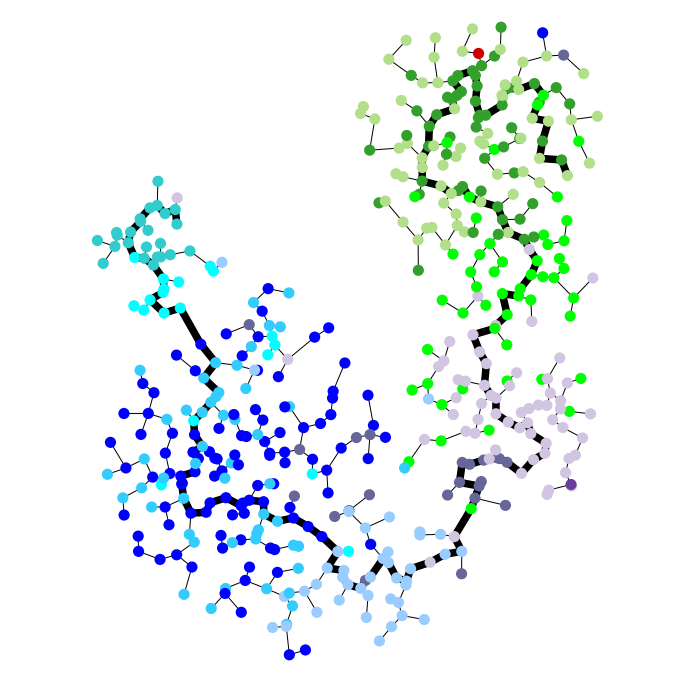

In [37]:
tsne = tsne_spatial
cell_groups = s_groups_2nd
cmap = cmap_2nd

#initialize figure

height = 12
width = 12

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 2

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

#ylim = (ylim[0] - 2 * pad, ylim[1] - 2 * pad)
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

remove_ticks(ax1)

clist_tsne = [cmap[cell_groups[ix]] for ix in MST.nodes()]

nx.draw_networkx_edges(MST, pos = MST_pos_tsne, ax = ax1, with_labels = False, node_size = 125, linewidths = 0.0, 
                width = 1.0, edge_color = 'black', node_color = clist_tsne, vmin = 0, vmax = 1.0,
                edgecolor=clist_tsne)

nx.draw_networkx_edges(MST, pos = MST_pos_tsne, ax = ax1, edgelist = diam_edges.edges(), width = 7.5)

ax1.scatter([MST_pos_tsne[ix][0] for ix in MST.nodes()],
            [MST_pos_tsne[ix][1] for ix in MST.nodes()],
            s = 125,
            color = clist_tsne,
            linewidth = 0.0,
            edgecolor = clist_tsne)

clean_axis(ax1)

figname = 'v1.8_4_A_t-SNE_spatial.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

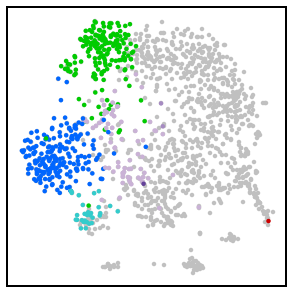

In [38]:
cell_groups = s_groups_1st
cmap = cmap_1st

#initialize figure

height = 5
width = 5

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw inset

ax_inset = plt.subplot()

remove_ticks(ax_inset)

ix_sel = dist_mat_tsne.index

clist_tsne_inset = [cmap[cell_groups[ix]] for ix in ix_sel]

ax_inset.scatter(tsne_1st['x'],
            tsne_1st['y'], 
            s = 20,
            linewidth = 0.0,
            c = 'silver',
            cmap = plt.cm.jet,
            vmin = 0, vmax = 1.0)

ax_inset.scatter(tsne_1st.ix[ix_sel, 'x'],
            tsne_1st.ix[ix_sel, 'y'], 
            s = 20,
            linewidth = 0.0,
            c = clist_tsne_inset,
            cmap = plt.cm.jet,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tsne_inset)

for s in ['top','bottom','left','right']:
    ax_inset.spines[s].set_linewidth(2)

figname = 'v1.8_4_A_t-SNE_spatial_Inset.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Validation of PSO with markers


Calculating binary logarithm of x + 1

Calculating binary logarithm of x + 1


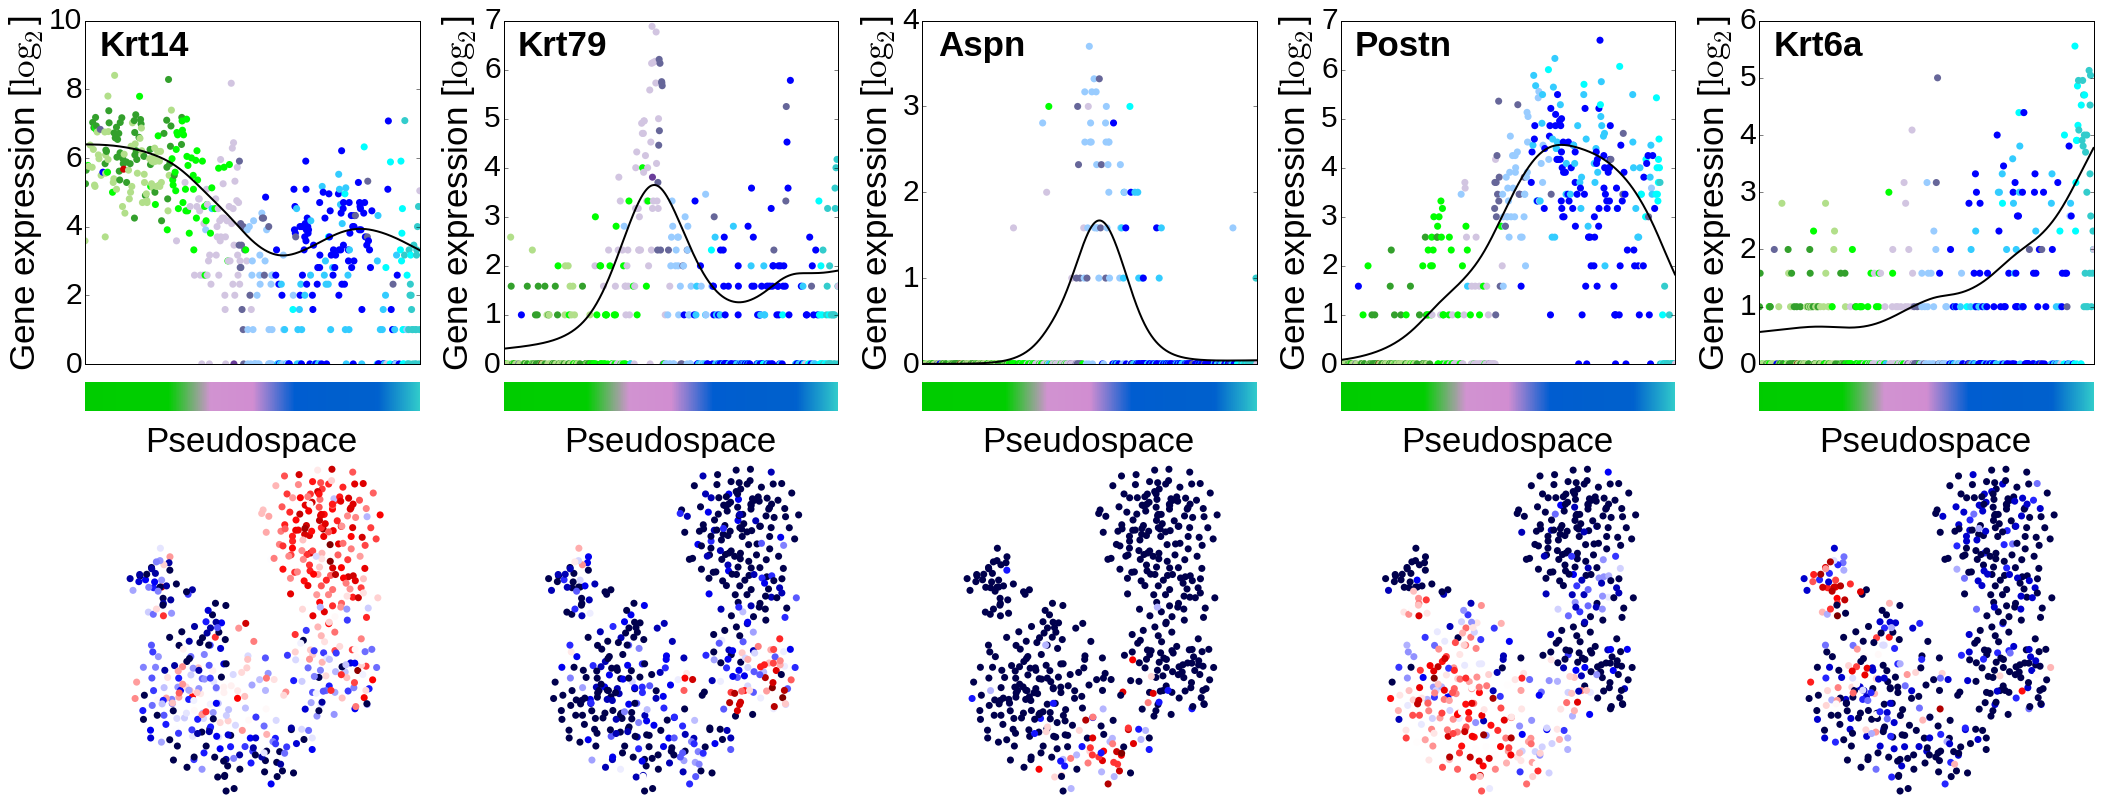

In [39]:
dataset = log2Transform(seq)
PTO_coords = PTO_coords_spatial
cell_groups = s_groups_2nd
tsne = tsne_spatial
fitted = log2Transform(spatial_fitted)
cmap = cmap_2nd

cmap_tsne = plt.cm.seismic

#fontsizes

size_ticklabs = 30
size_ylab = 35
size_xlab = 35
size_leglab = 35

#initialize figure

height = 14
width = 36

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs1 = plt.GridSpec(4, 5, hspace=0.1, wspace = 0.25, height_ratios=[6,0.5,0.2,6])

#define xlim

xlim = (np.min(PTO_coords.values), np.max(PTO_coords.values))

#define x- and y-limits for tsne plots

x_min_tsne, x_max_tsne = np.min(tsne['x']), np.max(tsne['x'])
y_min_tsne, y_max_tsne= np.min(tsne['y']), np.max(tsne['y'])
x_diff_tsne, y_diff_tsne = x_max_tsne - x_min_tsne, y_max_tsne - y_min_tsne

pad = 2.0

if x_diff_tsne > y_diff_tsne:
    xlim_tsne = (x_min_tsne - pad, x_max_tsne + pad)
    ylim_tsne = (y_min_tsne * (x_diff_tsne / y_diff_tsne) - pad, y_max_tsne * (x_diff_tsne / y_diff_tsne) + pad)

if x_diff_tsne < y_diff_tsne:
    xlim_tsne = (x_min_tsne * (y_diff_tsne/x_diff_tsne) - pad, x_max * (y_diff_tsne/x_diff_tsne) + pad)
    ylim_tsne = (y_min_tsne - pad, y_max_tsne + pad)

text_pad = 2

#plot Krt14

g = 'Krt14'

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(xlim)
ax1.set_xticks([])

ax1.set_ylim(0, 10)
for t in ax1.get_yticklabels():
    t.set_family('Liberation Sans')
    t.set_fontsize(size_ticklabs)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Liberation Sans', fontsize = size_ylab)

clist_tmp = [cmap[cell_groups[ix]] for ix in PTO_coords.index]

ax1.scatter(PTO_coords,
            dataset.ix[g, PTO_coords.index],
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(np.arange(0, np.max(PTO_coords)),
         list(fitted.ix[g]),
         color = 'black',
         linewidth = 2)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.925, g, fontsize = size_leglab, family = 'Liberation Sans', va = 'center', weight = 'bold')

#(b) Colorbar

ax1b = plt.subplot(gs1[1,0])
ax1b.set_xlim(0, np.max(PTO_coords.values))

for pos in np.arange(0, np.max(PTO_coords.values)):
    ax1b.axvspan(pos, pos + 1, color = cmap_GrVlBlCy(pos / np.max(PTO_coords.values)))

ax1b.set_xlabel('Pseudospace', family = 'Liberation Sans', fontsize = size_xlab, labelpad = 15)

clean_axis(ax1b)

#(c) TSNE

ax1c = plt.subplot(gs1[3,0])

ax1c.set_xlim(xlim_tsne)
ax1c.set_ylim(ylim_tsne)

remove_ticks(ax1c)

max_tmp = dataset.ix[g, tsne.index].max()

ax1c.scatter(tsne['x'],
             tsne['y'],
             c = dataset.ix[g, tsne.index],
             cmap = cmap_tsne,
             s = 50, linewidth = 0.0,
             edgecolor = [cmap_tsne(val / max_tmp) for val in dataset.ix[g, tsne.index]])

clean_axis(ax1c)

#plot Krt79

g = 'Krt79'

ax1 = plt.subplot(gs1[0,1])

ax1.set_xlim(xlim)
ax1.set_xticks([])

ax1.set_ylim(0, 7)
for t in ax1.get_yticklabels():
    t.set_family('Liberation Sans')
    t.set_fontsize(size_ticklabs)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Liberation Sans', fontsize = size_ylab)

clist_tmp = [cmap[cell_groups[ix]] for ix in PTO_coords.index]

ax1.scatter(PTO_coords,
            dataset.ix[g, PTO_coords.index],
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(np.arange(0, np.max(PTO_coords)),
         list(fitted.ix[g]),
         color = 'black',
         linewidth = 2)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.925, g, fontsize = size_leglab, family = 'Liberation Sans', va = 'center', weight = 'bold')

#(b) Colorbar

ax1b = plt.subplot(gs1[1,1])
ax1b.set_xlim(0, np.max(PTO_coords.values))

for pos in np.arange(0, np.max(PTO_coords.values)):
    ax1b.axvspan(pos, pos + 1, color = cmap_GrVlBlCy(pos / np.max(PTO_coords.values)))

ax1b.set_xlabel('Pseudospace', family = 'Liberation Sans', fontsize = size_xlab, labelpad = 15)

clean_axis(ax1b)

#(c) TSNE

ax1c = plt.subplot(gs1[3,1])

ax1c.set_xlim(xlim_tsne)
ax1c.set_ylim(ylim_tsne)

remove_ticks(ax1c)

max_tmp = dataset.ix[g, tsne.index].max()

ax1c.scatter(tsne['x'],
             tsne['y'],
             c = dataset.ix[g, tsne.index],
             cmap = cmap_tsne,
             s = 50, linewidth = 0.0,
             edgecolor = [cmap_tsne(val / max_tmp) for val in dataset.ix[g, tsne.index]])

clean_axis(ax1c)

#plot Aspn

g = 'Aspn'

ax1 = plt.subplot(gs1[0,2])

ax1.set_xlim(xlim)
ax1.set_xticks([])

ax1.set_ylim(0, 4)
ax1.set_yticks([4,3,2,1,0])
for t in ax1.get_yticklabels():
    t.set_family('Liberation Sans')
    t.set_fontsize(size_ticklabs)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Liberation Sans', fontsize = size_ylab)

clist_tmp = [cmap[cell_groups[ix]] for ix in PTO_coords.index]

ax1.scatter(PTO_coords,
            dataset.ix[g, PTO_coords.index],
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(np.arange(0, np.max(PTO_coords)),
         list(fitted.ix[g]),
         color = 'black',
         linewidth = 2)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.925, g, fontsize = size_leglab, family = 'Liberation Sans', va = 'center', weight = 'bold')

#(b) Colorbar

ax1b = plt.subplot(gs1[1,2])
ax1b.set_xlim(0, np.max(PTO_coords.values))

for pos in np.arange(0, np.max(PTO_coords.values)):
    ax1b.axvspan(pos, pos + 1, color = cmap_GrVlBlCy(pos / np.max(PTO_coords.values)))

ax1b.set_xlabel('Pseudospace', family = 'Liberation Sans', fontsize = size_xlab, labelpad = 15)

clean_axis(ax1b)

#(c) TSNE

ax1c = plt.subplot(gs1[3,2])

ax1c.set_xlim(xlim_tsne)
ax1c.set_ylim(ylim_tsne)

remove_ticks(ax1c)

max_tmp = dataset.ix[g, tsne.index].max()

ax1c.scatter(tsne['x'],
             tsne['y'],
             c = dataset.ix[g, tsne.index],
             cmap = cmap_tsne,
             s = 50, linewidth = 0.0,
             edgecolor = [cmap_tsne(val / max_tmp) for val in dataset.ix[g, tsne.index]])

clean_axis(ax1c)

#plot Postn

g = 'Postn'

ax1 = plt.subplot(gs1[0,3])

ax1.set_xlim(xlim)
ax1.set_xticks([])

ax1.set_ylim(0, 7)
for t in ax1.get_yticklabels():
    t.set_family('Liberation Sans')
    t.set_fontsize(size_ticklabs)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Liberation Sans', fontsize = size_ylab)

clist_tmp = [cmap[cell_groups[ix]] for ix in PTO_coords.index]

ax1.scatter(PTO_coords,
            dataset.ix[g, PTO_coords.index],
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(np.arange(0, np.max(PTO_coords)),
         list(fitted.ix[g]),
         color = 'black',
         linewidth = 2)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.925, g, fontsize = size_leglab, family = 'Liberation Sans', va = 'center', weight = 'bold')

#(b) Colorbar

ax1b = plt.subplot(gs1[1,3])
ax1b.set_xlim(0, np.max(PTO_coords.values))

for pos in np.arange(0, np.max(PTO_coords.values)):
    ax1b.axvspan(pos, pos + 1, color = cmap_GrVlBlCy(pos / np.max(PTO_coords.values)))

ax1b.set_xlabel('Pseudospace', family = 'Liberation Sans', fontsize = size_xlab, labelpad = 15)

clean_axis(ax1b)

#(c) TSNE

ax1c = plt.subplot(gs1[3,3])

ax1c.set_xlim(xlim_tsne)
ax1c.set_ylim(ylim_tsne)

remove_ticks(ax1c)

max_tmp = dataset.ix[g, tsne.index].max()

ax1c.scatter(tsne['x'],
             tsne['y'],
             c = dataset.ix[g, tsne.index],
             cmap = cmap_tsne,
             s = 50, linewidth = 0.0,
             edgecolor = [cmap_tsne(val / max_tmp) for val in dataset.ix[g, tsne.index]])

clean_axis(ax1c)

#plot Krt6a

g = 'Krt6a'

ax1 = plt.subplot(gs1[0,4])

ax1.set_xlim(xlim)
ax1.set_xticks([])

ax1.set_ylim(0, 6)
for t in ax1.get_yticklabels():
    t.set_family('Liberation Sans')
    t.set_fontsize(size_ticklabs)
ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Liberation Sans', fontsize = size_ylab)

clist_tmp = [cmap[cell_groups[ix]] for ix in PTO_coords.index]

ax1.scatter(PTO_coords,
            dataset.ix[g, PTO_coords.index],
            c = clist_tmp,
            s = 50,
            linewidth = 0.0,
            vmin = 0, vmax = 1.0,
            edgecolor = clist_tmp)

ax1.plot(np.arange(0, np.max(PTO_coords)),
         list(fitted.ix[g]),
         color = 'black',
         linewidth = 2)

ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.925, g, fontsize = size_leglab, family = 'Liberation Sans', va = 'center', weight = 'bold')

#(b) Colorbar

ax1b = plt.subplot(gs1[1,4])
ax1b.set_xlim(0, np.max(PTO_coords.values))

for pos in np.arange(0, np.max(PTO_coords.values)):
    ax1b.axvspan(pos, pos + 1, color = cmap_GrVlBlCy(pos / np.max(PTO_coords.values)))

ax1b.set_xlabel('Pseudospace', family = 'Liberation Sans', fontsize = size_xlab, labelpad = 15)

clean_axis(ax1b)

#(c) TSNE

ax1c = plt.subplot(gs1[3,4])

ax1c.set_xlim(xlim_tsne)
ax1c.set_ylim(ylim_tsne)

remove_ticks(ax1c)

max_tmp = dataset.ix[g, tsne.index].max()

ax1c.scatter(tsne['x'],
             tsne['y'],
             c = dataset.ix[g, tsne.index],
             cmap = cmap_tsne,
             s = 50, linewidth = 0.0,
             edgecolor = [cmap_tsne(val / max_tmp) for val in dataset.ix[g, tsne.index]])

clean_axis(ax1c)

figname = 'v1.8_4_B_Spatial_validation.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Validation of t-SNE for PSO

In [157]:
PTO_coords_spatial_multi = (PTO_coords_spatial_multi - 1) * -1

In [158]:
PTO_coords_spatial_multi_corr = [PTO_coords_spatial.values,PTO_coords_spatial_multi[PTO_coords_spatial.index].values]

In [159]:
#invert pseudotime if necessary and normalize data

ch_1, ch_2 = [x for x in chunks(PTO_coords_spatial.index, (len(PTO_coords_spatial.index) + 1) / 2)]

for ix in PTO_coords_spatial_tSNE_it.index:
    max_tmp = PTO_coords_spatial_tSNE_it.ix[ix].max()

    if PTO_coords_spatial_tSNE_it.ix[ix, ch_1].mean() > PTO_coords_spatial_tSNE_it.ix[ix, ch_2].mean():
            PTO_coords_spatial_tSNE_it.ix[ix] = (PTO_coords_spatial_tSNE_it.ix[ix] - max_tmp) * -1
            
PTO_coords_spatial_tSNE_it = PTO_coords_spatial_tSNE_it.apply(lambda x: x / np.max(x), axis = 1)

In [160]:
#define fused list of corr_analysis

X, Y = [], []

for ix in PTO_coords_spatial_tSNE_it.index:
    
    X += list(PTO_coords_spatial[PTO_coords_spatial_tSNE_it.ix[ix].index])
    Y += list(PTO_coords_spatial_tSNE_it.ix[ix])
    
PTO_coords_spatial_tSNE_it_corr = [X,Y]

In [161]:
#invert pseudotime if necessary and normalize data

for ix in PTO_coords_spatial_tSNE_res.index:
    ix_tmp = PTO_coords_spatial_tSNE_res.ix[ix, PTO_coords_spatial.index][~PTO_coords_spatial_tSNE_res.ix[ix, PTO_coords_spatial.index].isnull()].index
    
    ch_1, ch_2 = [x for x in chunks(PTO_coords_spatial[ix_tmp].index, (len(PTO_coords_spatial[ix_tmp].index) + 1) / 2)]
    max_tmp = PTO_coords_spatial_tSNE_res.ix[ix, ix_tmp].max()

    if PTO_coords_spatial_tSNE_res.ix[ix, ch_1].mean() > PTO_coords_spatial_tSNE_res.ix[ix, ch_2].mean():
            PTO_coords_spatial_tSNE_res.ix[ix, ix_tmp] = (PTO_coords_spatial_tSNE_res.ix[ix, ix_tmp] - max_tmp) * -1
            
    PTO_coords_spatial_tSNE_res.ix[ix, ix_tmp] = PTO_coords_spatial_tSNE_res.ix[ix, ix_tmp] / max_tmp

In [162]:
#define fused list of corr_analysis

X, Y = [], []

for ix in PTO_coords_spatial_tSNE_res.index:
    
    ix_tmp = PTO_coords_spatial_tSNE_res.ix[ix, PTO_coords_spatial.index][~PTO_coords_spatial_tSNE_res.ix[ix, PTO_coords_spatial.index].isnull()].index

    X += list(PTO_coords_spatial[PTO_coords_spatial_tSNE_res.ix[ix, ix_tmp].index])
    Y += list(PTO_coords_spatial_tSNE_res.ix[ix, ix_tmp])
    
PTO_coords_spatial_tSNE_res_corr = [X,Y]

In [163]:
#invert pseudotime if necessary and normalize data

ch_1, ch_2 = [x for x in chunks(PTO_coords_spatial.index, (len(PTO_coords_spatial.index) + 1) / 2)]

for ix in PTO_coords_spatial_tSNE_shf.index:
    max_tmp = PTO_coords_spatial_tSNE_shf.ix[ix].max()

    if PTO_coords_spatial_tSNE_shf.ix[ix, ch_1].mean() > PTO_coords_spatial_tSNE_shf.ix[ix, ch_2].mean():
            PTO_coords_spatial_tSNE_shf.ix[ix] = (PTO_coords_spatial_tSNE_shf.ix[ix] - max_tmp) * -1

    
PTO_coords_spatial_tSNE_shf = PTO_coords_spatial_tSNE_shf.apply(lambda x: x / np.max(x), axis = 1)

In [164]:
#define fused list of corr_analysis

X, Y = [], []

for ix in PTO_coords_spatial_tSNE_shf.index:
    
    X += list(PTO_coords_spatial[PTO_coords_spatial_tSNE_shf.ix[ix].index])
    Y += list(PTO_coords_spatial_tSNE_shf.ix[ix])
    
PTO_coords_spatial_tSNE_shf_corr = [X,Y]

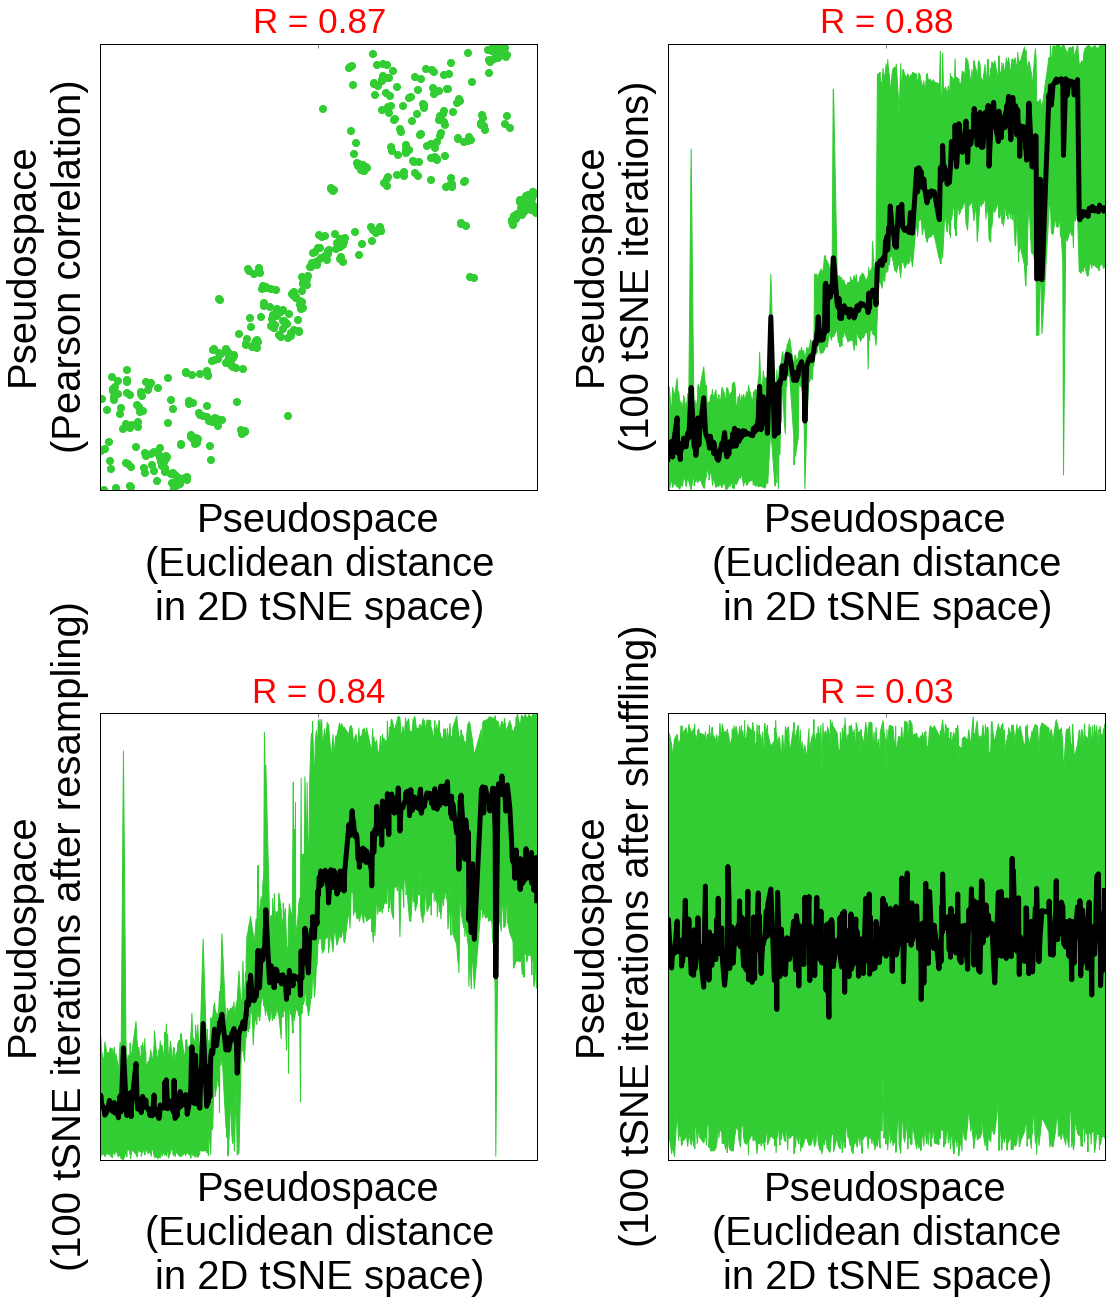

In [166]:
#initialize figure

height = 20
width = 18

fig = plt.figure(facecolor = 'w', figsize = (width, height))

gs = plt.GridSpec(2, 2, wspace = 0.3, hspace = 0.5)

###############################################################
##### tSNE vs. correlation distance

#define data

x_data = PTO_coords_spatial[PTO_coords_spatial.index].values
y_data = PTO_coords_spatial_multi[PTO_coords_spatial.index].values 
corr = PTO_coords_spatial_multi_corr

ax = plt.subplot(gs[0])

#define x-axis

ax.set_xlim(x_data.min(), x_data.max())

ax.set_xlabel('Pseudospace\n(Euclidean distance\nin 2D tSNE space)', family = 'Liberation Sans', fontsize = 40)
ax.xaxis.set_label_coords(x = 0.5, y = -0.025)
ax.xaxis.set_ticks([])

#define y-axis

ax.set_ylim(y_data.min(), y_data.max())

ax.set_ylabel('Pseudospace\n(Pearson correlation)', family = 'Liberation Sans', fontsize = 40)
ax.yaxis.set_label_coords(y = 0.5, x = -0.025)
ax.yaxis.set_ticks([])

#plot data

ax.scatter(x_data,
           y_data,
           c = 'limegreen', 
           s= 50, 
           edgecolor = 'limegreen')

#print corr

ax.xaxis.set_ticks_position('top')
ax.set_xticks([np.max(PTO_coords_spatial) * 0.5])
ax.set_xticklabels(['R = %.2f' % scipy.stats.pearsonr(corr[0], corr[1])[0]], 
                   family = 'Liberation Sans', fontsize = 35, color = 'red')

###############################################################

ax = plt.subplot(gs[1])

#define dataset

x_data = PTO_coords_spatial
y_data = PTO_coords_spatial_tSNE_it[PTO_coords_spatial.index]
corr = PTO_coords_spatial_tSNE_it_corr

#define x-axis

ax.set_xlim(PTO_coords_spatial.min(), PTO_coords_spatial.max())

ax.set_xlabel('Pseudospace\n(Euclidean distance\nin 2D tSNE space)', family = 'Liberation Sans', fontsize = 40)
ax.xaxis.set_label_coords(x = 0.5, y = -0.025)
ax.xaxis.set_ticks([])

#define y-axis

ax.set_ylim(0, 1)

ax.set_ylabel('Pseudospace\n(%s tSNE iterations)' % len(y_data.index), family = 'Liberation Sans', fontsize = 40)
ax.yaxis.set_label_coords(y = 0.5, x = -0.025)
ax.yaxis.set_ticks([])

#normalize dataset

y_data = y_data.apply(lambda x: x / np.max(x), axis = 1)

#plot median and percentiles

ax.plot(x_data,
       y_data.median(axis = 0),
        color = 'black', 
        linewidth = 5)

ax.fill_between(x_data, 
                y_data.quantile(q = 0.05, axis = 0), 
                y_data.quantile(q = 0.95, axis = 0), 
                color = 'limegreen', alpha = 1)

ax.xaxis.set_ticks_position('top')
ax.set_xticks([np.max(PTO_coords_spatial) * 0.5])
ax.set_xticklabels(['R = %.2f' % scipy.stats.pearsonr(corr[0], corr[1])[0]], 
                   family = 'Liberation Sans', fontsize = 35, color = 'red')

###############################################################

ax = plt.subplot(gs[2])

#define dataset

x_data = PTO_coords_spatial
y_data = PTO_coords_spatial_tSNE_res[PTO_coords_spatial.index]
corr = PTO_coords_spatial_tSNE_res_corr

#define x-axis

ax.set_xlim(PTO_coords_spatial.min(), PTO_coords_spatial.max())

ax.set_xlabel('Pseudospace\n(Euclidean distance\nin 2D tSNE space)', family = 'Liberation Sans', fontsize = 40)
ax.xaxis.set_label_coords(x = 0.5, y = -0.025)
ax.xaxis.set_ticks([])

#define y-axis

ax.set_ylim(0, 1)

ax.set_ylabel('Pseudospace\n(%s tSNE iterations after resampling)' % len(y_data.index), family = 'Liberation Sans', fontsize = 40)
ax.yaxis.set_label_coords(y = 0.5, x = -0.025)
ax.yaxis.set_ticks([])
    
#plot median and percentiles

ax.plot(x_data,
       y_data.median(axis = 0),
        color = 'black', 
        linewidth = 5)

ax.fill_between(x_data, 
                y_data.quantile(q = 0.05, axis = 0), 
                y_data.quantile(q = 0.95, axis = 0), 
                color = 'limegreen', alpha = 1)

ax.xaxis.set_ticks_position('top')
ax.set_xticks([np.max(PTO_coords_spatial) * 0.5])
ax.set_xticklabels(['R = %.2f' % scipy.stats.pearsonr(corr[0], corr[1])[0]], 
                   family = 'Liberation Sans', fontsize = 35, color = 'red')

###############################################################

ax = plt.subplot(gs[3])

#define dataset

x_data = PTO_coords_spatial
y_data = PTO_coords_spatial_tSNE_shf[PTO_coords_spatial.index]
corr = PTO_coords_spatial_tSNE_shf_corr

#define x-axis

ax.set_xlim(PTO_coords_spatial.min(), PTO_coords_spatial.max())

ax.set_xlabel('Pseudospace\n(Euclidean distance\nin 2D tSNE space)', family = 'Liberation Sans', fontsize = 40)
ax.xaxis.set_label_coords(x = 0.5, y = -0.025)
ax.xaxis.set_ticks([])

#define y-axis

ax.set_ylim(0, 1)

ax.set_ylabel('Pseudospace\n(%s tSNE iterations after shuffling)' % len(y_data.index), family = 'Liberation Sans', fontsize = 40)
ax.yaxis.set_label_coords(y = 0.5, x = -0.025)
ax.yaxis.set_ticks([])

#normalize dataset

y_data = y_data.apply(lambda x: x / np.max(x), axis = 1)
    
#plot median and percentiles

ax.plot(x_data,
       y_data.median(axis = 0),
        color = 'black', 
        linewidth = 5)

ax.fill_between(x_data, 
                y_data.quantile(q = 0.05, axis = 0), 
                y_data.quantile(q = 0.95, axis = 0), 
                color = 'limegreen', alpha = 1)

ax.xaxis.set_ticks_position('top')
ax.set_xticks([np.max(PTO_coords_spatial) * 0.5])
ax.set_xticklabels(['R = %.2f' % scipy.stats.pearsonr(corr[0], corr[1])[0]], 
                   family = 'Liberation Sans', fontsize = 35, color = 'red')

figname = 'v1.8_S5_A_Pseudospace_t-SNE_validation.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

#  KDE groups

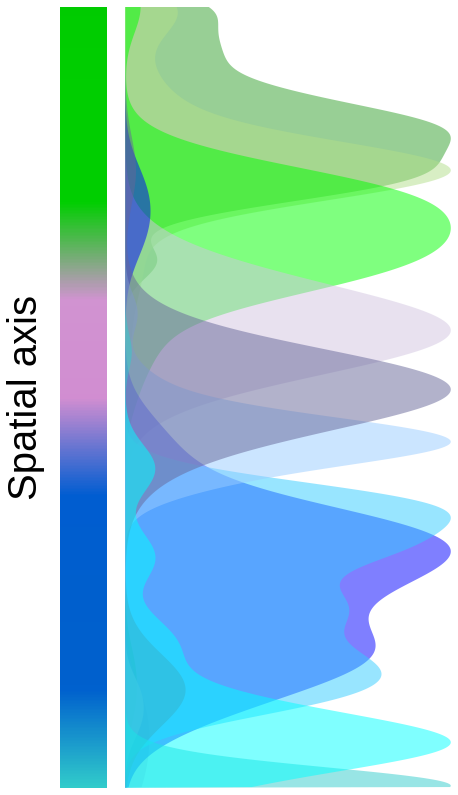

In [141]:
ax_scale = 1.0

#initialize figure

height = 14
width = 7
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs1 = plt.GridSpec(1, 2, hspace=0.0, wspace = 0.1, width_ratios=[1, 7])

#plot KDEs

ax = plt.subplot(gs1[0,1])

ax.set_ylim(np.max(pseudospace_corr_max), 0)

for gr in [0,1,2,10,15,16,17,18,20,21]:
    
    ix_tmp = s_groups_2nd[s_groups_2nd==gr].index
    pos_tmp = pseudospace_corr_max[ix_tmp]
    
    kde_tmp = scipy.stats.gaussian_kde(pos_tmp)
    kde_y = list(np.arange(0, np.max(pseudospace_corr_max), 1))
    kde_tmp.set_bandwidth(0.3)
    kde_x_tmp = kde_tmp.evaluate(kde_y)
    
    kde_y_tmp = [0] + list(np.arange(0, np.max(pseudospace_corr_max), 1)) + [np.max(pseudospace_corr_max)]
    kde_x_tmp = [0] + [float(x) / np.max(kde_x_tmp) for x in kde_x_tmp] + [0]
    
    ax.fill(kde_x_tmp, kde_y_tmp, linewidth = 0, color = cmap_2nd[gr], alpha = 0.5)
    
clean_axis(ax)

#Colorbar

ax = plt.subplot(gs1[0,0])

ax.set_ylim(np.max(pseudospace_corr_max, 0))

for pos in np.arange(0, np.max(pseudospace_corr_max.values)):
    ax.axhspan(pos, pos + 1, color = cmap_GrVlBlCy(pos / np.max(pseudospace_corr_max.values)))
               
ax.set_ylabel('Spatial axis', family = 'Liberation Sans', fontsize = 40, labelpad = 15)

ax.set_yticks(np.arange(0,np.max(pseudospace_corr_max), 10))

clean_axis(ax)


figname = 'v1.8_4_E_Pseudospace_KDE.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

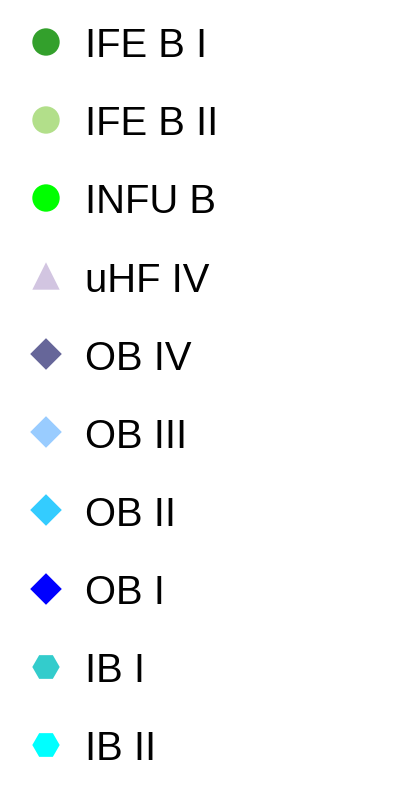

In [142]:
#initialize figure

width = 7
height = 14

fig = plt.figure(facecolor = 'w', figsize = (width, height))

gs = plt.GridSpec(1,1)

ax0 = fig.add_subplot(gs[0])
ax0.set_ylim(9.5, -0.5)
ax0.set_xlim(0, 1)

group_list = [0,1,2,10,18,17,16,15,20,21]

x = 0.1

for pos, ix in enumerate(group_list):      
    
    ax0.scatter(x, pos - 0.05, c = cmap_2nd[ix], marker = markers_2nd[ix], vmin = 0, vmax = 1.0, s = markers_2nd_size[ix], 
                linewidth = 0.0)
        
    ax0.text(x + 0.1, pos, nmap_2nd_short[ix], family = 'Liberation Sans', fontsize = 40, va = 'center', ha = 'left')
    
clean_axis(ax0)


figname = 'v1.8_4_E_Legend_groups.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Overlapping genetic signatures

In [232]:
NBR_2nd_summary = loadData_from_pickle_v1(path_output, exp_id,'NBR_2nd_summary')
NBR_2nd_bin_bl = loadData_from_pickle_v1(path_output,exp_id,'NBR_2nd_bin_bl')
NBR_2nd_size_bl = loadData_from_pickle_v1(path_output,exp_id,'NBR_2nd_size_bl')
NBR_2nd_bin_gr = loadData_from_pickle_v1(path_output,exp_id,'NBR_2nd_bin_gr')
NBR_2nd_size_gr = loadData_from_pickle_v1(path_output,exp_id,'NBR_2nd_size_gr')

In [233]:
#bring into compatible format

bin_mat_2nd = pd.DataFrame(index = NBR_2nd_bin_bl.columns)

for gr in NBR_2nd_bin_bl.columns:
    
    genes_tmp = list(NBR_2nd_bin_bl[gr][NBR_2nd_bin_bl[gr]==1].index)
    
    for g in genes_tmp:
    
        bin_mat_2nd.ix[gr, g] = 1
        
bin_mat_2nd = bin_mat_2nd.fillna(0)

In [234]:
jaccard_2nd = GRN_get_jaccard_dist(bin_mat_2nd)

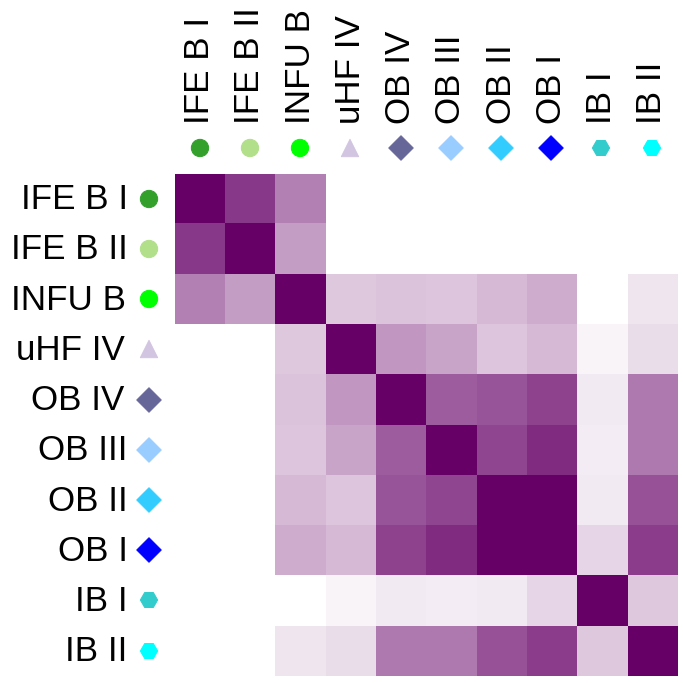

In [235]:
group_list = [0,1,2,10,18,17,16,15,20,21]
dataset = jaccard_2nd.ix[group_list, group_list]

#define colormap

from matplotlib.colors import LinearSegmentedColormap

cmap_tmp = LinearSegmentedColormap.from_list("cmap_tmp", ('#FFFFFF','#660066'), N = 100)

#initialize figure

height = 12
width = 12

fig = plt.figure(facecolor = 'w', figsize = (width, height))

gs1 = plt.GridSpec(2, 2, hspace=0.00, wspace=0.00, height_ratios=[3,9], width_ratios = [3,9])

#draw heatmap in pseudotime

ax0 = plt.subplot(gs1[1,1])

ax0.matshow(dataset, aspect = 'auto', cmap = cmap_tmp, vmin = 0.2, vmax = 0.5)

clean_axis(ax0)

#draw labels

ax1 = plt.subplot(gs1[0,1])
ax1.set_xlim(-0.5, 9.5)
ax1.set_ylim(0,1)


ax2 = plt.subplot(gs1[1,0])
ax2.set_ylim(9.5, -0.5)
ax2.set_xlim(1,0)

for pos, ix in enumerate(group_list):
      
    ax1.scatter(pos, 0.15, color = cmap_2nd[ix], marker = markers_2nd[ix], s = 300)
    ax2.scatter(0.15, pos, color = cmap_2nd[ix], marker = markers_2nd[ix], s = 300)  
    
    ax1.text(pos, 0.3, nmap_2nd_short[ix], family = 'Liberation Sans', fontsize = 35,
             rotation = 'vertical', va = 'bottom', ha = 'center')
    
    ax2.text(0.3, pos, nmap_2nd_short[ix], family = 'Liberation Sans', fontsize = 35,
             rotation = 'horizontal', va = 'center', ha = 'right')
    
    clean_axis(ax1)
    clean_axis(ax2)
 
figname = 'v1.8_S5_D_Spatial_shared_signatures.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

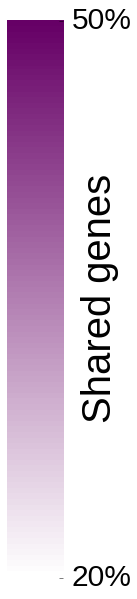

In [236]:
#initialize figure

height = 10
width = 1

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw

axLabel = plt.subplot()

axLabel.matshow(np.matrix(np.arange(0.5, 0.2, -0.001)).T,
                cmap = cmap_tmp, aspect = 'auto', vmin = 0.2, vmax = 0.5)

axLabel.xaxis.set_ticks([])
axLabel.yaxis.set_ticks_position('right')

clean_axis(axLabel)

axLabel.set_yticks([300,0])
axLabel.set_yticklabels(['20%','50%'], family = 'Liberation Sans', fontsize = 30, va = 'center')
axLabel.tick_params(axis='y', which='major', pad=10)

axLabel.set_ylabel('Shared genes', family = 'Liberation Sans', fontsize = 40)
axLabel.yaxis.set_label_coords(2, 0.5)

figname = 'v1.8_S5_D_Shared_signatures_legend.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Selection of pseudotime dependent genes

## Select genes with p-value < Bonferroni(0.001)

In [202]:
bonferroni_spatial = 0.001 / len(spatial_stats.index)

In [203]:
genes_sel = spatial_stats['Pr(>Chisq)'][spatial_stats['Pr(>Chisq)'] < bonferroni_spatial].index

In [204]:
len(genes_sel)

547

### Plot mean expression vs. p-value and selected genes

"\nfigname = 'v1.8_S5_B_P_values_pseudospace.pdf'\nplt.savefig('%s/%s' % (path_figures, figname), \n            format = 'pdf', \n            transparent = True, \n            bbox_inches = 'tight', \n            pad_inches = 0, \n            rasterized = True)\n"

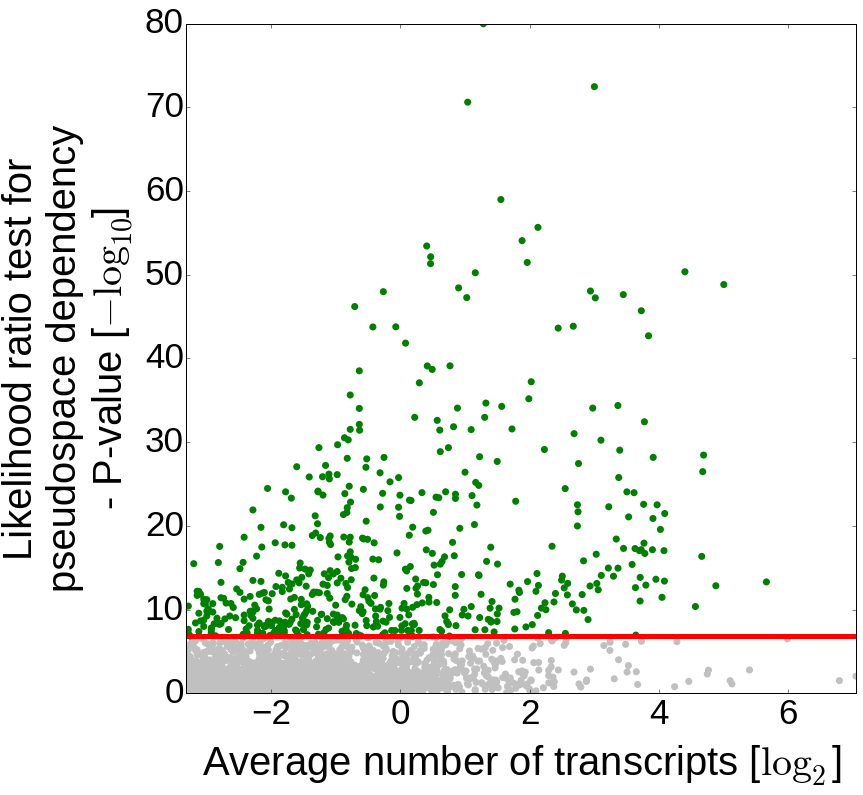

In [205]:
#create data

x_data = np.log2(seq.ix[spatial_stats.index, PTO_coords_spatial.index].mean(axis = 1))
y_data = -np.log10(spatial_stats.ix[spatial_stats.index, 'Pr(>Chisq)'])

#create color list

clist = pd.Series('silver', index = spatial_stats.index)
clist.ix[genes_sel] = 'green'

#initialize figure

height = 12
width = 12

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax = plt.subplot()

#define x-axis

ax.set_xlim(x_data.min(), x_data.max())

ax.set_xlabel('Average number of transcripts [$\log_2$]', family = 'Liberation Sans', fontsize = 40)
ax.xaxis.set_label_coords(x = 0.5, y = -0.075)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(35) 
                tick.label.set_family('Liberation Sans')   

#define y-axis

ax.set_ylim(y_data.min(), y_data.max())

ax.set_ylabel('Likelihood ratio test for\npseudospace dependency\n- P-value [$-\log_{10}$]', family = 'Liberation Sans', fontsize = 40)
ax.yaxis.set_label_coords(y = 0.5, x = -0.075)
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(35) 
                tick.label.set_family('Liberation Sans')   

#plot data

ax.scatter(x_data,
           y_data,
           c = clist, 
           linewidth = 0, 
           s= 50, 
           edgecolor = clist)

ax.axhline(y = -np.log10(bonferroni_spatial), c = 'r', linewidth = 5)
"""
figname = 'v1.8_S5_B_P_values_pseudospace.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)
"""


Calculating binary logarithm of x + 1

Calculating binary logarithm of x + 1


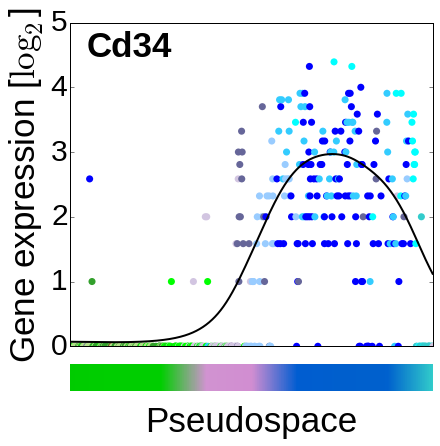

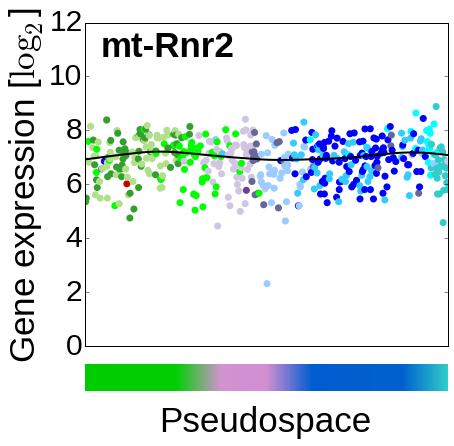

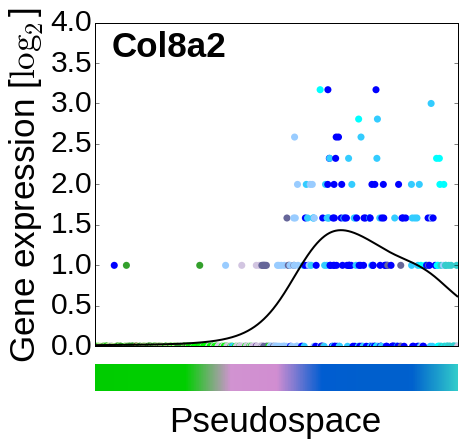

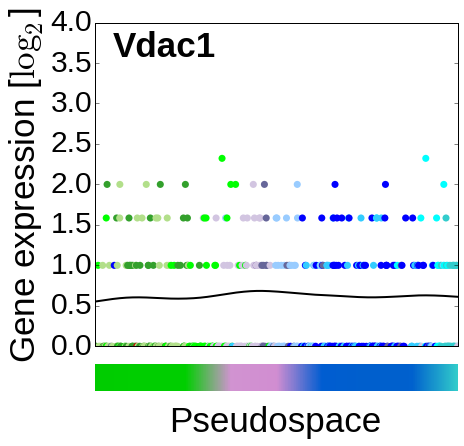

In [198]:
dataset = log2Transform(seq)
PTO_coords = PTO_coords_spatial
cell_groups = s_groups_2nd
fitted = log2Transform(spatial_fitted)
cmap = cmap_2nd

cmap_tsne = plt.cm.seismic

genes = ['Cd34','mt-Rnr2','Col8a2','Vdac1']
y_max_genes = [5,12,4,4]

#fontsizes

size_ticklabs = 30
size_ylab = 35
size_xlab = 35
size_leglab = 35

#iterate over genes

for ix, g in enumerate(genes):
    
    figname = 'v1.8_S5_B_PS_%s.pdf' % g

    #initialize figure

    height = 6.6
    width = 6.5

    fig = plt.figure(facecolor = 'w', figsize = (width, height))

    #initialize GridSpec

    gs1 = plt.GridSpec(2, 1, hspace=0.1, wspace = 0.25, height_ratios=[6, 0.5])

    #define xlim

    xlim = (np.min(PTO_coords.values), np.max(PTO_coords.values))

    ax1 = plt.subplot(gs1[0,0])

    ax1.set_xlim(xlim)
    ax1.set_xticks([])

    ax1.set_ylim(0, y_max_genes[ix])
    for t in ax1.get_yticklabels():
        t.set_family('Liberation Sans')
        t.set_fontsize(size_ticklabs)
    ax1.set_ylabel('Gene expression [$\log_2$]', family = 'Liberation Sans', fontsize = size_ylab)

    clist_tmp = [cmap[cell_groups[ix]] for ix in PTO_coords.index]

    ax1.scatter(PTO_coords,
                dataset.ix[g, PTO_coords.index],
                c = clist_tmp,
                s = 50,
                linewidth = 0.0,
                vmin = 0, vmax = 1.0,
                edgecolor = clist_tmp)

    ax1.plot(np.arange(0, np.max(PTO_coords)),
             list(fitted.ix[g]),
             color = 'black',
             linewidth = 2)

    ax1.text(ax1.get_xlim()[1] * 0.05, ax1.get_ylim()[1] * 0.925, g, fontsize = size_leglab, family = 'Liberation Sans', va = 'center', weight = 'bold')

    #(b) Colorbar

    ax1b = plt.subplot(gs1[1,0])
    
    ax1b.set_xlim(0, np.max(PTO_coords.values))

    for pos in np.arange(0, np.max(PTO_coords.values)):
        ax1b.axvspan(pos, pos + 1, color = cmap_GrVlBlCy(pos / np.max(PTO_coords.values)))

    ax1b.set_xlabel('Pseudospace', family = 'Liberation Sans', fontsize = size_xlab, labelpad = 15)

    clean_axis(ax1b)
    
    plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Pseudospace dependent genes  - rolling wave

In [92]:
#normalize

spatial_splines_norm = log2Transform(spatial_fitted).ix[g_groups_spatial.index].apply(lambda x: x / np.max(x), axis = 1)


Calculating binary logarithm of x + 1


In [93]:
spatial_InPeDe = PTO_define_peak(spatial_splines_norm, cutoff = 0.75)

In [94]:
g_groups_spatial = PTO_order_groups_InPe(g_groups_spatial, spatial_InPeDe, ['peak','induction','deactivation'])

In [95]:
len(g_groups_spatial)

547

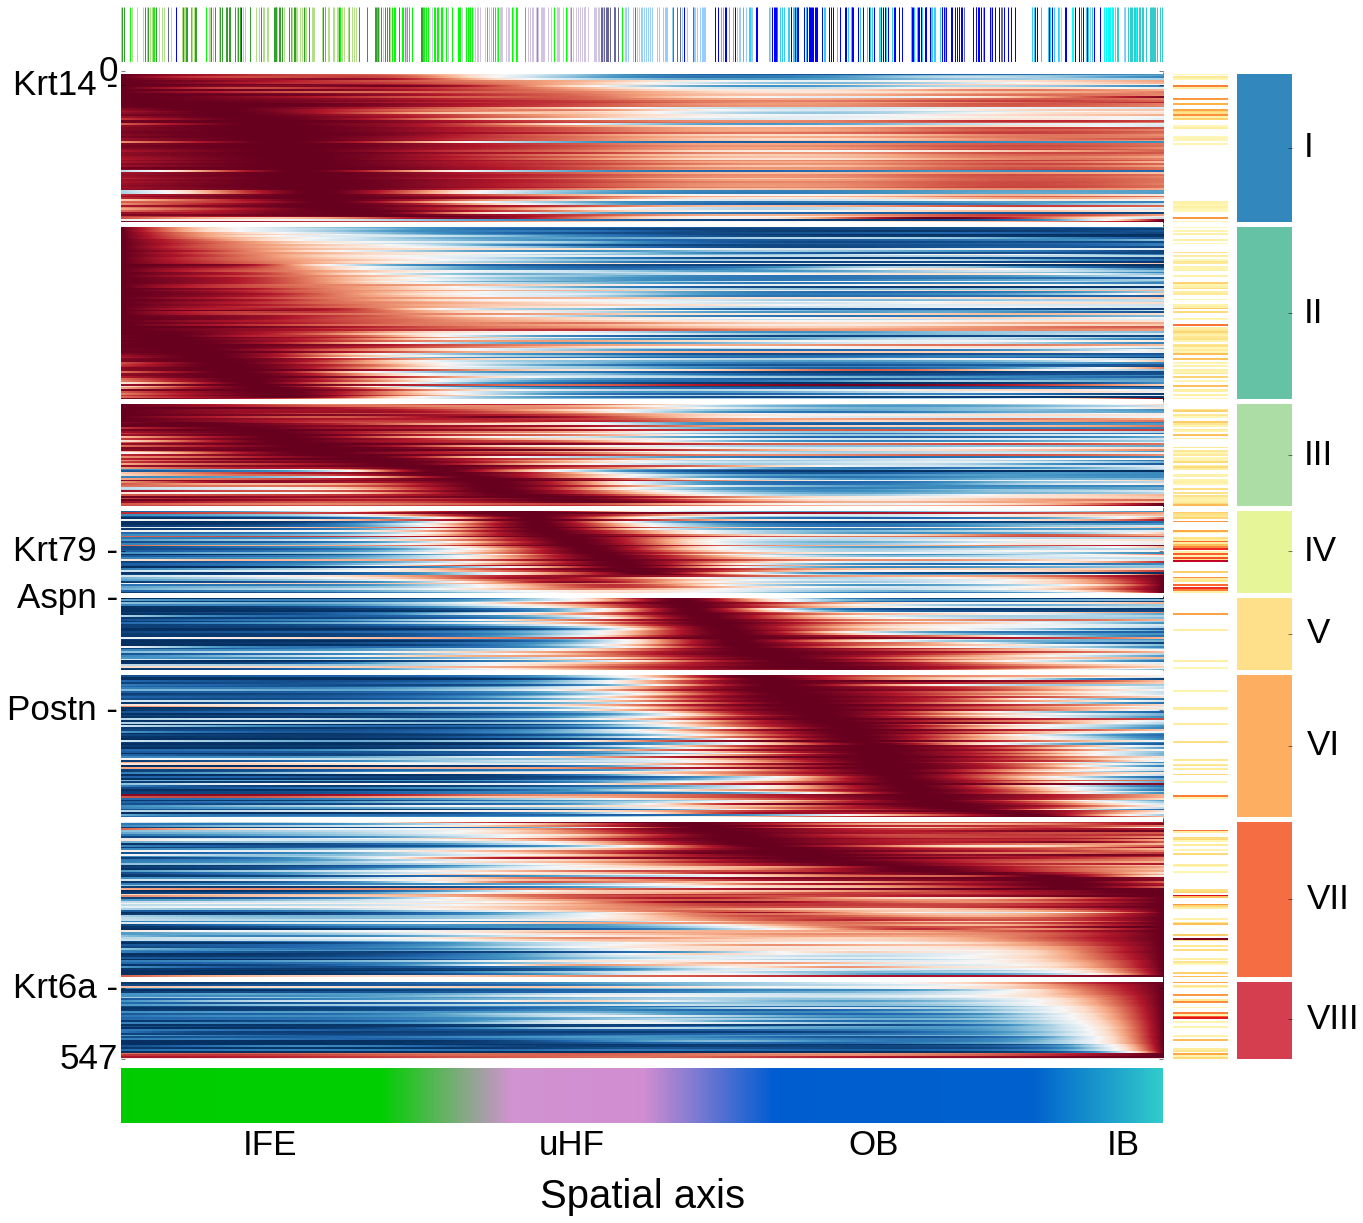

In [114]:
dataset = spatial_splines_norm.ix[g_groups_spatial.index]
cell_groups = s_groups_2nd
gene_groups = g_groups_spatial
PTO_coords = PTO_coords_spatial
cmap = cmap_2nd
cmap_g = cmap_g_spatial
nmap_g = nmap_g_spatial
PT_stats = -np.log10(IFE_stats.ix[gene_groups.index, 'Pr(>Chisq)'])
PT_cutoff = -np.log10(0.001 / len(IFE_stats.index))

#initialize figure

height = 20
width = 21

fig = plt.figure(facecolor = 'w', figsize = (width, height))

gs1 = plt.GridSpec(3, 3, hspace=0.025, wspace=0.025, height_ratios=[1,18,1], width_ratios = [19,1,1])

#draw heatmap in pseudotime

ax0 = plt.subplot(gs1[1,0])
ax0.set_ylim(len(dataset.index), 0)

ax0.matshow(dataset, aspect = 'auto', cmap = plt.cm.RdBu_r, vmin = 0, vmax = 1.0)

remove_ticks(ax0)
clean_axis(ax0)

ix_tmp = list(dataset.index)

ax0.set_yticks([0, len(dataset.index), ix_tmp.index('Krt6a'), ix_tmp.index('Postn'), ix_tmp.index('Aspn'), ix_tmp.index('Krt79'), ix_tmp.index('Krt14')])
ax0.set_yticklabels([0, len(dataset.index), 'Krt6a - ', 'Postn - ', 'Aspn - ', 'Krt79 - ','Krt14 - '], 
                    family = 'Liberation Sans', fontsize = 35)

#s_group colors

ax1 = plt.subplot(gs1[0,0])

ax1.set_xlim(0, np.max([float(val) for val in dataset.columns]))

for ix in PTO_coords.index:
    
    ax1.vlines(x = PTO_coords[ix], ymin = 0, ymax = 1, 
               color = cmap[cell_groups[ix]], linewidth = 1.0)
    
clean_axis(ax1)
    
#PSO colors

ax2 = plt.subplot(gs1[2,0])

ax2.set_xlim(0,np.max(PTO_coords))

for pos in np.arange(0, np.max(PTO_coords.values)):
    ax2.axvspan(pos, pos + 1, color = cmap_GrVlBlCy(pos / np.max(PTO_coords.values)))
                   
ax2.set_xlabel('Spatial axis', family = 'Liberation Sans', fontsize = 40, labelpad = 15)
ax2.xaxis.set_label_coords(0.5, -1.0)


clean_axis(ax2)

ax2.text(150, -0.1, 'IFE', family = 'Liberation Sans', fontsize = 35, va = 'top', ha = 'center')
ax2.text(450, -0.1, 'uHF', family = 'Liberation Sans', fontsize = 35, va = 'top', ha = 'center')
ax2.text(750, -0.1, 'OB', family = 'Liberation Sans', fontsize = 35, va = 'top', ha = 'center')
ax2.text(1000, -0.1, 'IB', family = 'Liberation Sans', fontsize = 35, va = 'top', ha = 'center')

#genes groups

ax3 = plt.subplot(gs1[1,2])

ax3.set_ylim(len(dataset.index),0)

for pos, gr in enumerate(gene_groups.values):
    
    ax3.axhspan(pos, pos + 1, color = cmap_g[gr])
    
#gene group names

y_ticks = []

for gr in return_unique(gene_groups):
    
    start_tmp = list(gene_groups.values).index(gr)
    len_tmp = len(gene_groups[gene_groups==gr])
    y_ticks.append(start_tmp + (len_tmp * 0.5))
    
clean_axis(ax3)
    
ax3.set_yticks(y_ticks)
ax3.yaxis.set_ticks_position('right')
ax3.set_yticklabels([nmap_g[gr] for gr in return_unique(gene_groups)], family = 'Liberation Sans', fontsize = 35)
ax3.tick_params(axis='y', which='major', pad=15)

#pseudotime dependency

ax4 = plt.subplot(gs1[1,1])

ax4.set_ylim(len(gene_groups), 0)

for pos, g in enumerate(gene_groups.index):
    
    if g in PT_stats.index and PT_stats.ix[g] >= PT_cutoff:
        ax4.axhspan(pos, pos + 1, color = plt.cm.YlOrRd(PT_stats.ix[g] / PT_stats.max()))
        
    else:
        ax4.axhspan(pos, pos + 1, color = 'white')
        
clean_axis(ax4)

#draw lines

for gr in set(gene_groups):
    
    pos = list(gene_groups).index(gr)
    
    ax0.axhline(pos, color = 'white', linewidth = 5)
    ax3.axhline(pos, color = 'white', linewidth = 5)
    ax4.axhline(pos, color = 'white', linewidth = 5)
    
figname = 'v1.8_4_C_Spatial_rolling_wave.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

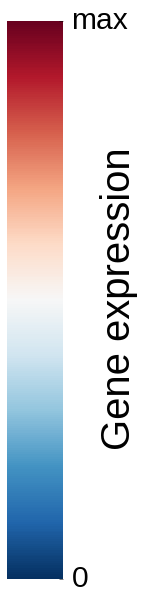

In [117]:
#initialize figure

height = 10
width = 1

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw

axLabel = plt.subplot()

axLabel.set_ylim(0,1)

for pos in np.arange(1.0, 0.0, -0.001):
    axLabel.axhspan(pos, pos + 0.001, color = plt.cm.RdBu_r(pos))


axLabel.xaxis.set_ticks([])
axLabel.yaxis.set_ticks_position('right')

clean_axis(axLabel)

axLabel.set_yticks([1.0,0.0])
axLabel.set_yticklabels(['max','0'], family = 'Liberation Sans', fontsize = 30, va = 'center')
axLabel.tick_params(axis='y', which='major', pad=10)

axLabel.yaxis.set_label_coords(2, 0.5)
axLabel.set_ylabel('Gene expression', family = 'Liberation Sans', fontsize = 40, va = 'center', ha = 'center')


figname = 'v1.8_4_C_Legend_expression.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

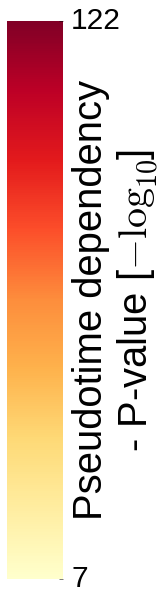

In [124]:
#initialize figure

height = 10
width = 1

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw

axLabel = plt.subplot()

axLabel.set_ylim(0,1)

for pos in np.arange(1.0, 0.0, -0.001):
    axLabel.axhspan(pos, pos + 0.001, color = plt.cm.YlOrRd(pos))


axLabel.xaxis.set_ticks([])
axLabel.yaxis.set_ticks_position('right')

clean_axis(axLabel)

axLabel.set_yticks([1.0,0.0])
axLabel.set_yticklabels(['122','7'], family = 'Liberation Sans', fontsize = 30, va = 'center')
axLabel.tick_params(axis='y', which='major', pad=10)

axLabel.yaxis.set_label_coords(2, 0.5)
axLabel.set_ylabel('Pseudotime dependency\n- P-value [$-\log_{10}$]', family = 'Liberation Sans', fontsize = 40, va = 'center', ha = 'center')


figname = 'v1.8_4_C_Legend_pseudotime.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Transcription factors

In [125]:
#select TFs among pseudospace dependent genes

TF_mm9 = open('%s/TF_mm9.txt' % path_input,'r').read().split()

TF_spatial = set(g_groups_spatial.index & TF_mm9)

#remove immediate early genes

IEG = ['Atf3','Atf4','Jun','Fos','Fosl1','Jund','Fosb']

TF_spatial = list(set(TF_spatial) - set(IEG))

In [126]:
len(TF_spatial)

46

In [127]:
#select most pseudotspace dependent TFS

TF_spatial_sel = spatial_stats.ix[TF_spatial, 'Pr(>Chisq)'].order()[:30].index

In [128]:
TF_spatial_sel_order = pd.Series(index = TF_spatial_sel)

for g in TF_spatial_sel:
    TF_spatial_sel_order[g] = list(g_groups_spatial.index).index(g)

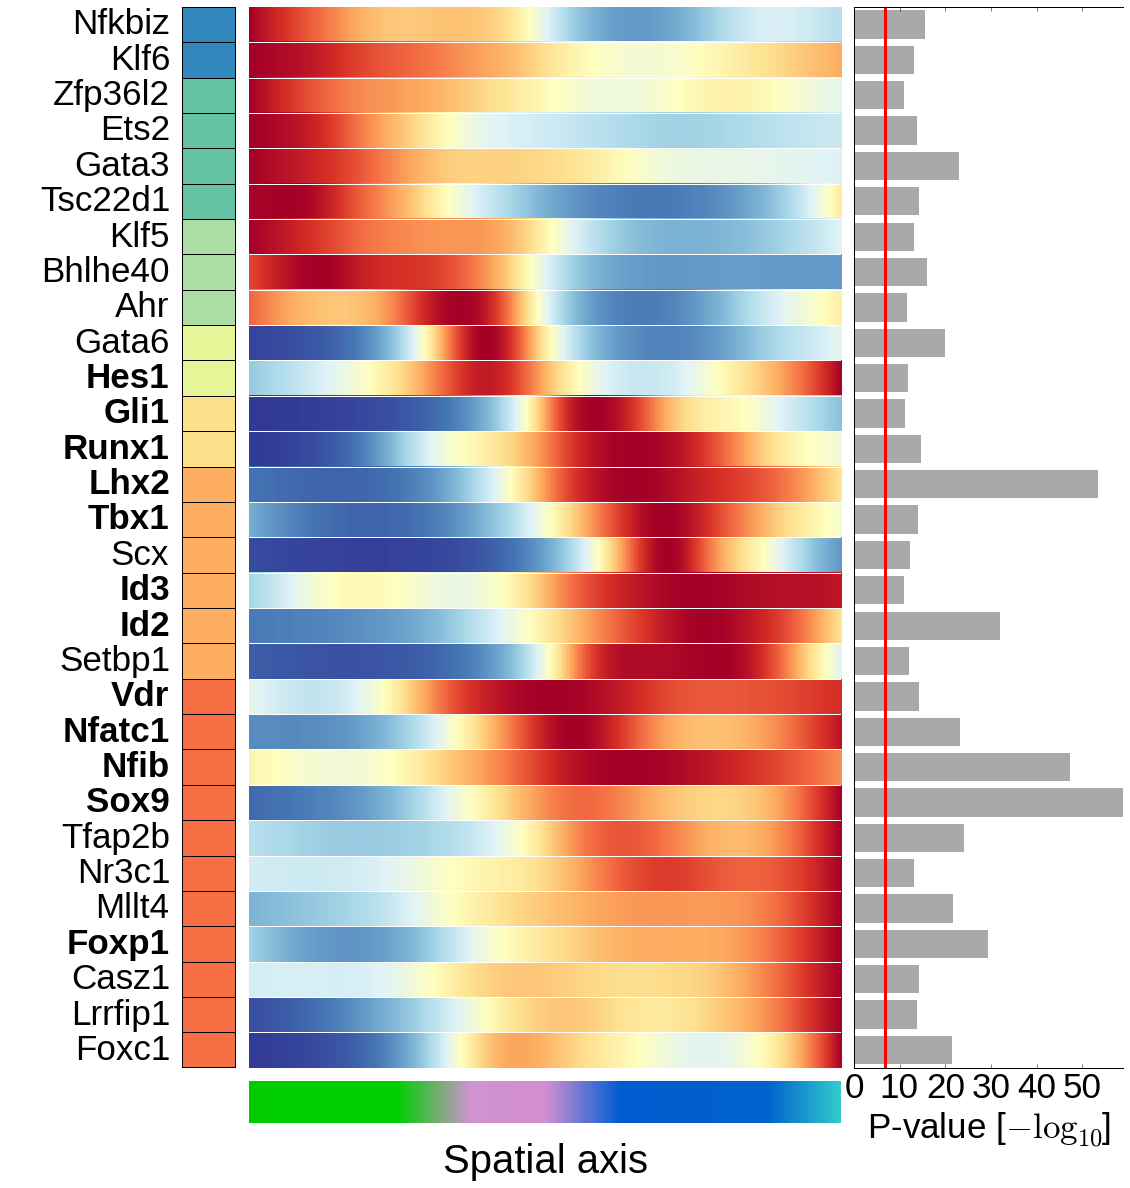

In [139]:
#data

TF_sel = TF_spatial_sel_order
TF_bold = ['Vdr','Sox9','Foxp1','Nfib','Nfatc1','Id2','Id3','Tbx1','Lhx2','Runx1','Gli1','Hes1']
splines = spatial_splines_norm
p_val = -np.log10(spatial_stats['Pr(>Chisq)'])
cutoff = -np.log10(bonferroni_spatial)
gene_groups = g_groups_spatial
cmap_gene_groups = cmap_g_spatial
cmap_splines = plt.cm.RdYlBu_r
cmap_colorbar = cmap_GrVlBlCy

#initialize figure

height = 20
width = 20

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#initialize GridSpec

gs = plt.GridSpec(2, 4, hspace=0.025, wspace=0.05, height_ratios=[19.25,0.75], width_ratios=[3,1,11,5])

#plot TF names

ax = plt.subplot(gs[0,0])

ax.set_xlim(0,1)
ax.set_ylim(len(TF_sel.index) - 0.5, -0.5)

for pos, g in enumerate(TF_sel.order().index):
    
    if g in TF_bold:
        ax.text(1.0, pos, g, family = 'Liberation Sans', fontsize = 35, 
                ha = 'right', va = 'center', fontweight = 'bold')
        
    else:
        ax.text(1.0, pos, g, family = 'Liberation Sans', fontsize = 35, 
                ha = 'right', va = 'center')
        
clean_axis(ax)

#plot TF groups

ax = plt.subplot(gs[0,1])

ax.set_xlim(0,1)
ax.set_ylim(len(TF_sel.index), 0.0)

lw = 1

for pos, g in enumerate(TF_sel.order().index):
    ax.axhspan(pos, pos + 1, color = cmap_gene_groups[gene_groups[g]])
    ax.axhline(pos, color = 'black', linewidth = lw)
    
ax.axhline(pos + 0.99, color = 'black', linewidth = lw)    
ax.axvline(0, color = 'black', linewidth = lw)
ax.axvline(0.99, color = 'black', linewidth = lw)

clean_axis(ax)

#plot spline heatmap

ax = plt.subplot(gs[0,2])

ax.matshow(splines.ix[TF_sel.order().index], aspect = 'auto', cmap = cmap_splines, vmin = 0, vmax = 1.0)

for pos, g in enumerate(TF_sel.order().index):
    ax.axhline(pos + 0.5, color = 'white', linewidth = lw)

clean_axis(ax)

#plot spline colorbar

ax = plt.subplot(gs[1,2])

x_max = np.max([float(x) for x in splines.columns])

ax.set_xlim(0, x_max)

for pos in np.arange(0, x_max):
    ax.axvspan(pos, pos + 1, color = cmap_colorbar(pos / x_max))
    
ax.set_xlabel('Spatial axis', family = 'Liberation Sans', fontsize = 40, labelpad = 20)

clean_axis(ax)

#plot p-value

ax = plt.subplot(gs[0,3])

ax.spines['right'].set_color('none')

ax.set_xlim(0, p_val.ix[TF_sel.order().index].max())
ax.set_ylim(len(TF_sel.index) - 0.5, -0.5)

ax.barh(bottom = [x - 0.4 for x in range(len(TF_sel.index))], 
        width = p_val.ix[TF_sel.order().index], 
        height = 0.8, color = 'darkgrey', linewidth = 0)

ax.axvline(cutoff, color = 'red', linewidth = 3)

ax.set_xlabel('P-value [$-\log_{10}$]', 
              family = 'Liberation Sans', fontsize = 35)
#ax.xaxis.set_label_coords(0.5, -0.075)

for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(35) 
                tick.label.set_family('Liberation Sans')
            
ax.set_yticks([])

figname = 'v1.8_4_D_Spatial_TFs.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

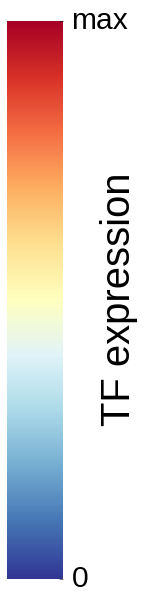

In [140]:
#initialize figure

height = 10
width = 1

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#draw

axLabel = plt.subplot()

axLabel.set_ylim(0,1)

for pos in np.arange(1.0, 0.0, -0.001):
    axLabel.axhspan(pos, pos + 0.001, color = plt.cm.RdYlBu_r(pos))


axLabel.xaxis.set_ticks([])
axLabel.yaxis.set_ticks_position('right')

clean_axis(axLabel)

axLabel.set_yticks([1.0,0.0])
axLabel.set_yticklabels(['max','0'], family = 'Liberation Sans', fontsize = 30, va = 'center')
axLabel.tick_params(axis='y', which='major', pad=10)

axLabel.yaxis.set_label_coords(2, 0.5)
axLabel.set_ylabel('TF expression', family = 'Liberation Sans', fontsize = 40, va = 'center', ha = 'center')


figname = 'v1.8_4_D_Legend_expression.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Checkpoint for IPA

In [64]:
def create_gene_list_for_IPA(dataset, groups):
    
    """
    Returns a binarized gene list as input for IPA.
    ----------
    dataset: DataFrame of m cells x n genes.
    groups: Series of gene group IDs.
    ----------
    """
    
    output = pd.DataFrame(0, index = dataset.index, columns = return_unique(groups))
    
    for gr in return_unique(groups):
        
        genes_tmp = groups[groups==gr].index
        
        output.ix[genes_tmp, gr] = 1
        
    return output

In [65]:
#saveData_v1(g_groups_basal_all_, path_output, exp_id, 'g_groups_basal_all_')

In [12]:
g_groups_basal_all_ = loadData_v1(path_output, exp_id, 'g_groups_basal_all_', 'Series')

In [16]:
return_unique(g_groups_basal_all_)

[1, 0, 7, 8, 2, 9, 5, 4, 6, 3, 10]

In [18]:
for g in g_groups_basal_all_[g_groups_basal_all_==4].index:
    print g

Cbr2
Igfbp3
Dst
Iffo2
Col7a1
Col17a1
Prss23
Tgfbi
Slc38a2
Fgfr3


In [67]:
pseudospace_IPA = create_gene_list_for_IPA(seq, g_groups_basal_all_)

In [68]:
#saveData_v1(pseudospace_IPA, path_output, exp_id, 'pseudospace_IPA')

# Spatial gene groups - averaged splines

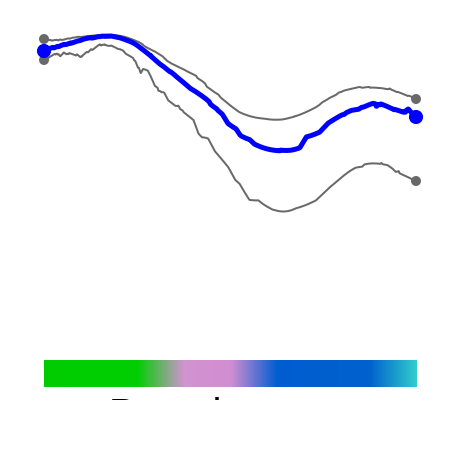

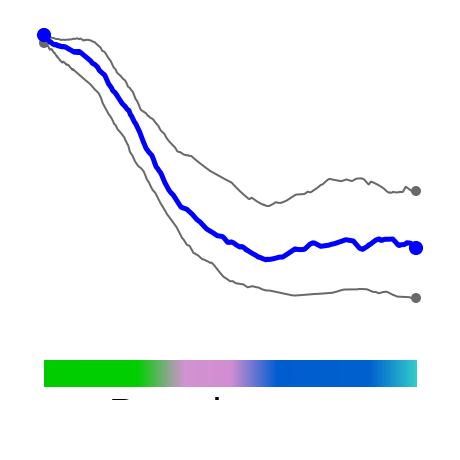

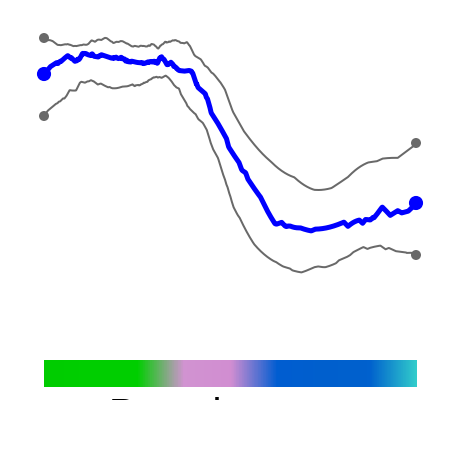

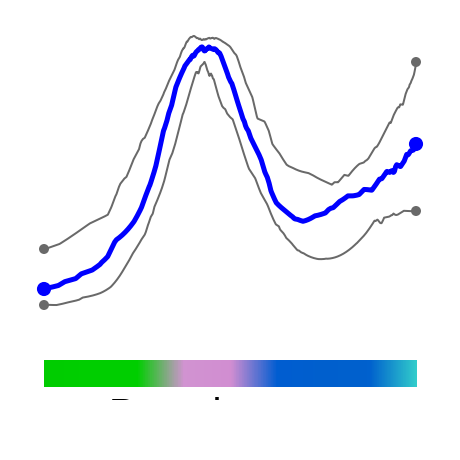

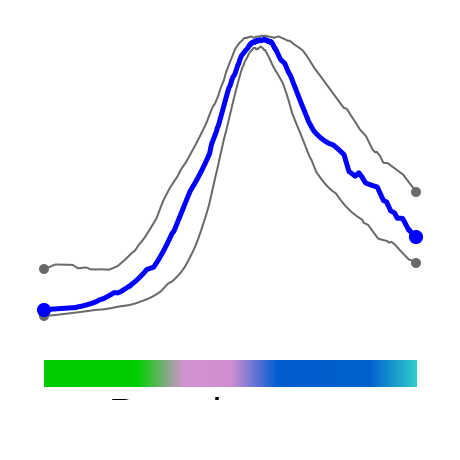

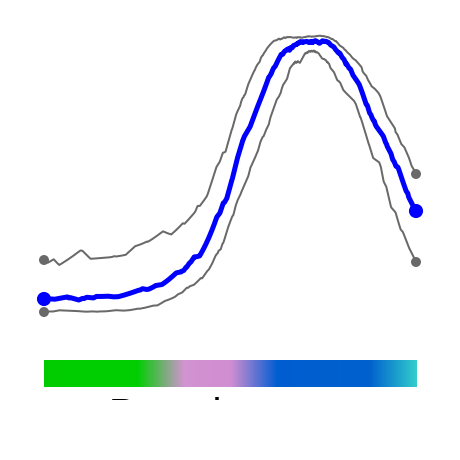

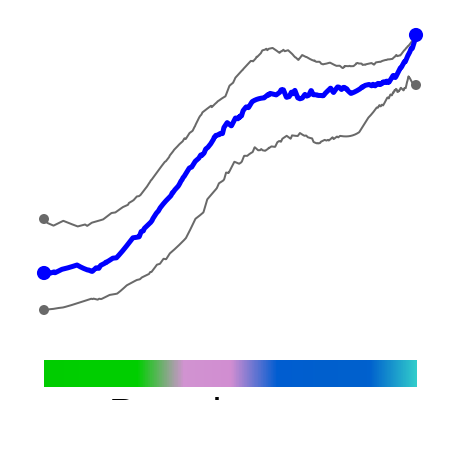

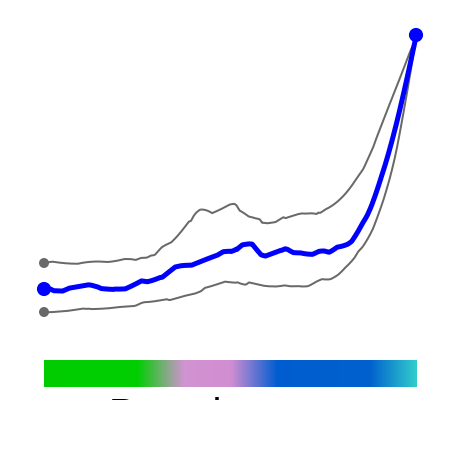

In [144]:
dataset = spatial_splines_norm
g_groups = g_groups_spatial

for pos, gr in enumerate(return_unique(g_groups)):
    
    figname = 'v1.8_S5_D1-%s_splines.pdf' % pos

    genes_sel = g_groups[g_groups==gr].index

    x_min = - max(dataset.columns.astype(float)) * 0.1
    x_max = max(dataset.columns.astype(float)) * 1.1

    y_min = -0.1
    y_max = 1.1

    fig = plt.figure(facecolor = 'w', figsize = (8,8))

    gs = plt.GridSpec(3, 1, hspace=0.1, wspace=0.00, height_ratios=[6.5,0.5,1.0])

    ax = plt.subplot(gs[0])

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #plot mean

    ax.plot([float(val) for val in dataset.columns], 
            [val for val in dataset.ix[genes_sel].median(axis = 0)], 
            linewidth = 5, color = 'blue')

    ax.scatter([float(dataset.columns[0]), float(dataset.columns[-1])], 
               [dataset.ix[genes_sel].median(axis = 0).values[0], dataset.ix[genes_sel].median(axis = 0).values[-1]], 
               s = 200, c = 'blue', linewidths = 0)

    #Plot percentile 1

    perc_1 = [np.percentile(dataset.ix[genes_sel, pos], 25) for pos in dataset.columns]

    ax.plot([float(val) for val in dataset.columns],
            perc_1, 
            linewidth = 2, color = 'dimgrey', zorder = 0)

    ax.scatter([float(dataset.columns[0]), float(dataset.columns[-1])], 
               [perc_1[0], perc_1[-1]], 
               s = 100, c = 'dimgrey', linewidths = 0, zorder = 0)

    #Plot percentile 2

    perc_2 = [np.percentile(dataset.ix[genes_sel, pos], 75) for pos in dataset.columns]

    ax.plot([float(val) for val in dataset.columns],
            perc_2, 
            linewidth = 2, color = 'dimgrey', zorder = 0)

    ax.scatter([float(dataset.columns[0]), float(dataset.columns[-1])], 
               [perc_2[0], perc_2[-1]], 
               s = 100, c = 'dimgrey', linewidths = 0, zorder = 0)

    clean_axis(ax)

    #plot pseudotime bar

    ax = plt.subplot(gs[1])

    ax.set_xlim(x_min, x_max)

    for pos in np.arange(0, max(dataset.columns.astype(float)), 1):
        ax.axvspan(pos, pos + 1, color = cmap_GrVlBlCy(float(pos) / max(dataset.columns.astype(float))))

    ax.set_xlabel('Pseudospace', family = 'Liberation Sans', fontsize = 40, labelpad = 10)

    clean_axis(ax)

    #plot spaceholder axis

    ax = plt.subplot(gs[2])
    ax.set_xlim(x_min, x_max)
    clean_axis(ax)
    
    plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Gene regulatory network inference

In [145]:
g_spatial_corr_dist = log2Transform(seq.ix[g_groups_spatial.index, PTO_coords_spatial.index]).T.corr()


Calculating binary logarithm of x + 1


In [147]:
g_spatial_CLR = GRN_CLR(g_spatial_corr_dist)

In [148]:
g_spatial_shNN = GRN_shared_NN(g_spatial_CLR, 25, 5)


Find 25 nearest neighbors for each gene

Find shared nearest neighbors

Drop all edges between genes with less than 5 shared nearest neighbors


In [149]:
G, G_pos = GRN_create_nx(g_spatial_shNN, drop_alone=True)

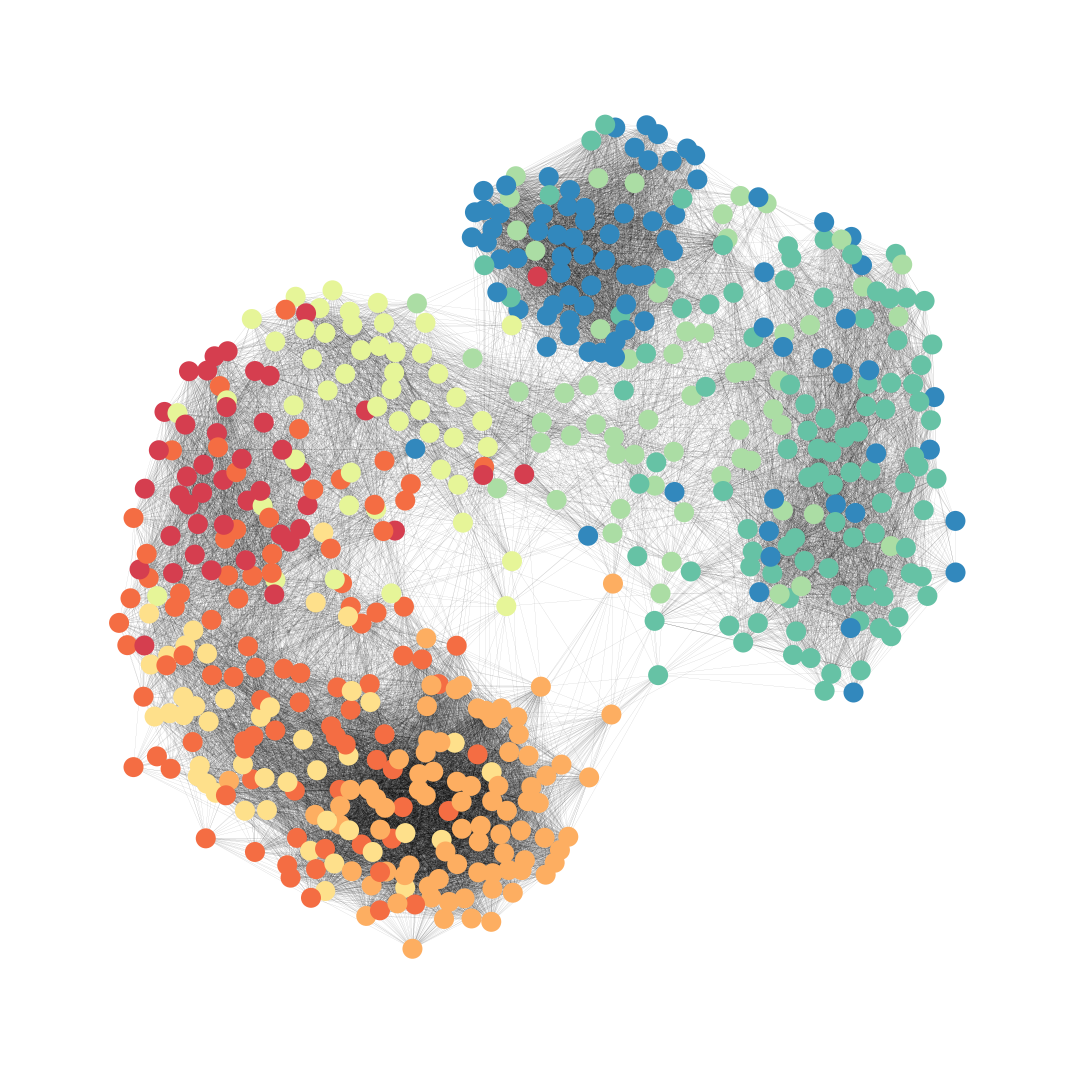

In [206]:
cmap = cmap_g_spatial
gene_groups = g_groups_spatial

#initialize figure

height = 19
width = 19

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define axis limits

x_pos = [val[0] for val in G_pos.values()]
y_pos = [val[1] for val in G_pos.values()]

offset = 50

xlim = (np.min(x_pos) - offset, np.max(x_pos) + offset)
ylim = (np.min(y_pos) - offset, np.max(y_pos) + offset)

############################################################################

ax0 = plt.subplot()

#set axlims

ax0.set_xlim(xlim[0], xlim[1])
ax0.set_ylim(ylim[0], ylim[1])

#draw nodes


nx.draw_networkx_nodes(G, 
                       G_pos,
                       ax = ax0,
                       node_size = 400,
                       node_color = [cmap[gene_groups[g]] for g in G.nodes()],
                       linewidths = 0.0)

nx.draw_networkx_edges(G,
                       G_pos,
                       ax=ax0, 
                       width = 0.05,
                       edge_color='black')

clean_axis(ax0)

figname = 'v1.8_S5_C_Gene_network.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

In [207]:
def GNR_mark_gene(G, G_pos, gene):
    
    #initialize figure

    height = 19
    width = 19

    fig = plt.figure(facecolor = 'w', figsize = (width, height))

    #define axis limits

    x_pos = [val[0] for val in G_pos.values()]
    y_pos = [val[1] for val in G_pos.values()]

    offset = 50

    xlim = (np.min(x_pos) - offset, np.max(x_pos) + offset)
    ylim = (np.min(y_pos) - offset, np.max(y_pos) + offset)

    ############################################################################

    ax0 = plt.subplot()

    #set axlims

    ax0.set_xlim(xlim[0], xlim[1])
    ax0.set_ylim(ylim[0], ylim[1])
    
    #define nodecolor
    
    nodecolor = []
    
    for g in G.nodes():
        
        if g == gene:
            nodecolor.append('red')
        
        else:
            nodecolor.append('silver')

    #draw nodes


    nx.draw_networkx_nodes(G, 
                           G_pos,
                           ax = ax0,
                           node_size = 300,
                           node_color = nodecolor,
                           linewidths = 0.0)

    nx.draw_networkx_edges(G,
                           G_pos,
                           ax=ax0, 
                           width = 0.025,
                           edge_color='black')

    clean_axis(ax0)

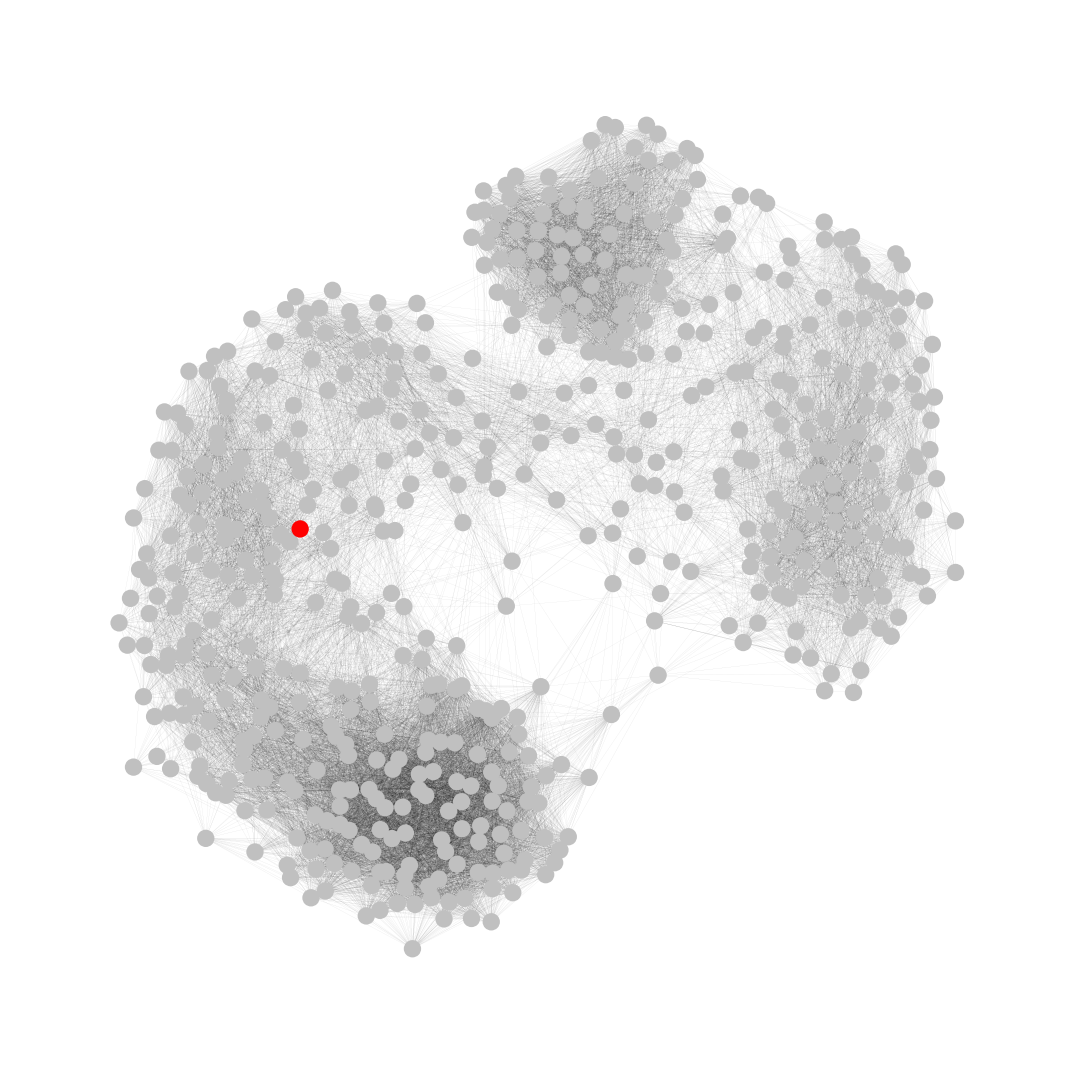

In [212]:
GNR_mark_gene(G, G_pos, 'Krt6a')

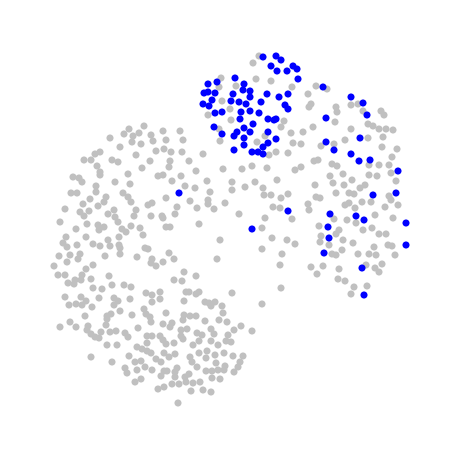

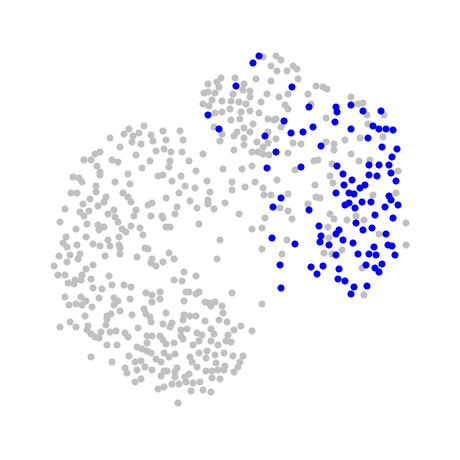

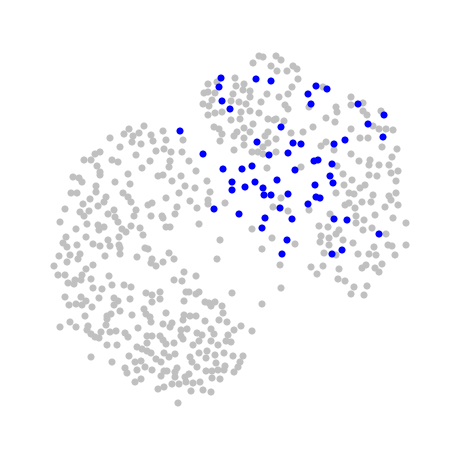

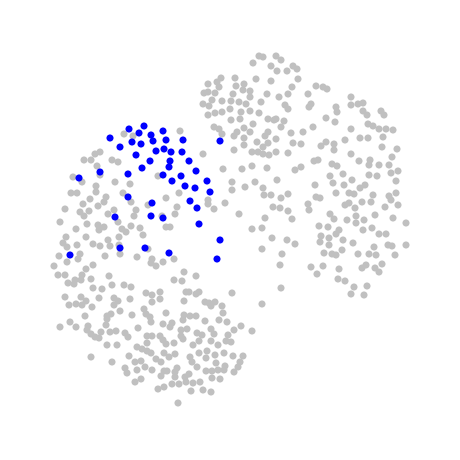

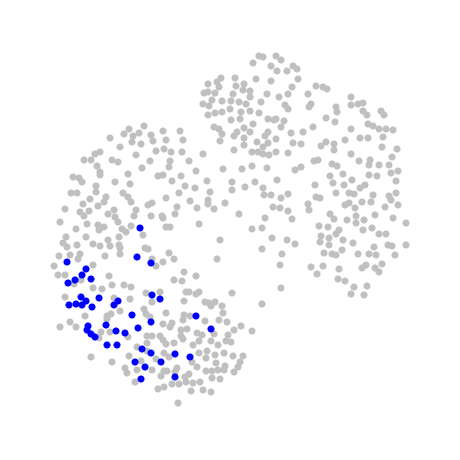

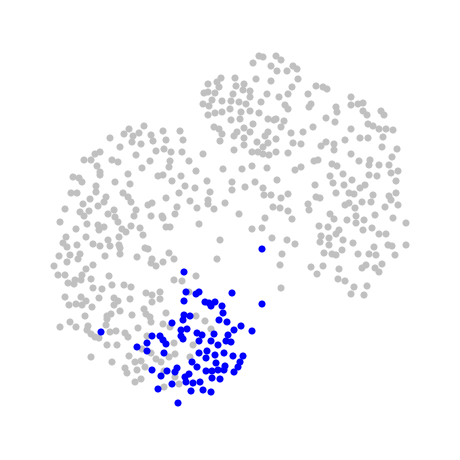

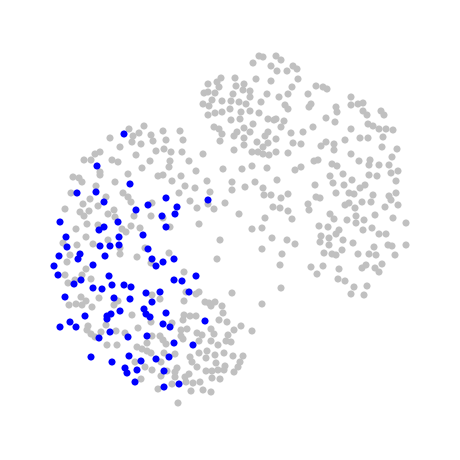

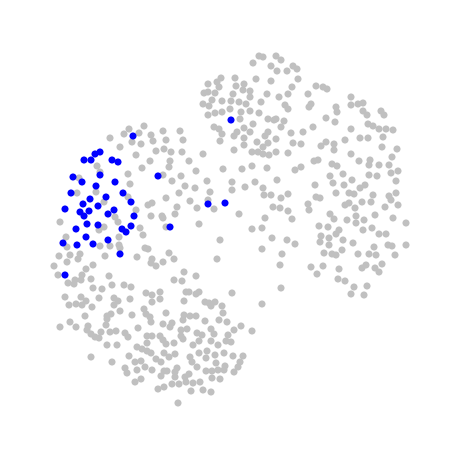

In [153]:
g_groups = g_groups_spatial

for pos, gr in enumerate(return_unique(g_groups)):
    
    figname = 'v1.8_S5_D2-%s_network.pdf' % pos

    #define gr indices

    genes_sel = list(set(g_groups[g_groups==gr].index))
                     
    #initialize figure

    height = 8
    width = 8

    fig = plt.figure(facecolor = 'w', figsize = (width, height))

    #define axis limits

    x_pos = [val[0] for val in G_pos.values()]
    y_pos = [val[1] for val in G_pos.values()]

    offset = 50

    xlim = (np.min(x_pos) - offset, np.max(x_pos) + offset)
    ylim = (np.min(y_pos) - offset, np.max(y_pos) + offset)

    ############################################################################

    ax0 = plt.subplot()

    #set axlims

    ax0.set_xlim(xlim[0], xlim[1])
    ax0.set_ylim(ylim[0], ylim[1])

    #draw nodes

    nx.draw_networkx_nodes(G, 
                           G_pos,
                           nodelist = [n for n in G.nodes() if n not in genes_sel],
                           ax = ax0,
                           node_size = 50,
                           node_color = 'silver',
                           linewidths = 0.0)

    nx.draw_networkx_nodes(G, 
                           G_pos,
                           nodelist = [n for n in G.nodes() if n in genes_sel],
                           ax = ax0,
                           node_size = 50,
                           node_color = 'blue',
                           linewidths = 0.0)
    
    clean_axis(ax0)
    
    plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

In [154]:
for gr in return_unique(g_groups_spatial):
    
    TF_tmp = [ix for ix in g_groups_spatial[g_groups_spatial==gr].index if ix in TF_spatial]
    
    print gr, TF_tmp

0 ['Nfkbiz', 'Klf6']
7 ['Klf2', 'Tfap2c', 'Zfp36l2', 'Ets2', 'Nr4a1', 'Gata3', 'Tsc22d1']
1 ['Klf5', 'Nfkbia', 'Bhlhe40', 'Ahr']
5 ['Gata6', 'Hes1']
4 ['Hoxc8', 'Gli1', 'Gli2', 'Runx1']
2 ['Irx5', 'Lhx2', 'Tbx1', 'Scx', 'Id3', 'Id2', 'Setbp1', 'Smarca2']
3 ['Vdr', 'Nfatc1', 'Tcf12', 'Hopx', 'Mitf', 'Nfib', 'Nfat5', 'Sox9', 'Tfap2b', 'Nr3c1', 'Id4', 'Bnc2', 'Mllt4', 'Foxp1', 'Casz1', 'Lrrfip1', 'Mxi1', 'Foxc1', 'Hoxc13']
6 []


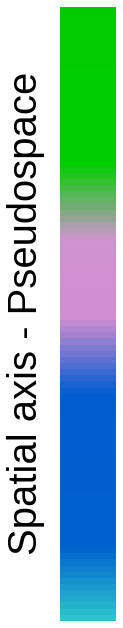

In [138]:
#initialize figure

height = 11
width = 1
    
fig = plt.figure(facecolor = 'w', figsize = (width, height))

#pseudotime legend

ax = plt.subplot(111)
ax.set_ylim(1, 0)
for pos in np.arange(0, 1, 0.01):
    ax.axhspan(pos, pos + 1, color = cmap_GrVlBlCy(pos))
ax.set_ylabel('Spatial axis - Pseudospace', family = 'Liberation Sans', fontsize = 40, labelpad = 15)

clean_axis(ax)

figname = 'v1.7_4_Spatial_legend.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Expression of spatial-related genes over 2nd level clusters

In [216]:
cell_groups = s_groups_2nd
gene_groups = g_groups_spatial
NBR_bin_bl = NBR_2nd_bin_bl

g_bin = pd.DataFrame(0, columns = return_unique(cell_groups), index = set(gene_groups))

for gr in return_unique(cell_groups): 
        
    for g_gr in set(gene_groups):
        
        g_ix = gene_groups[gene_groups==g_gr].index
        
        g_bin.ix[g_gr, gr] = NBR_bin_bl.ix[g_ix, gr].sum()

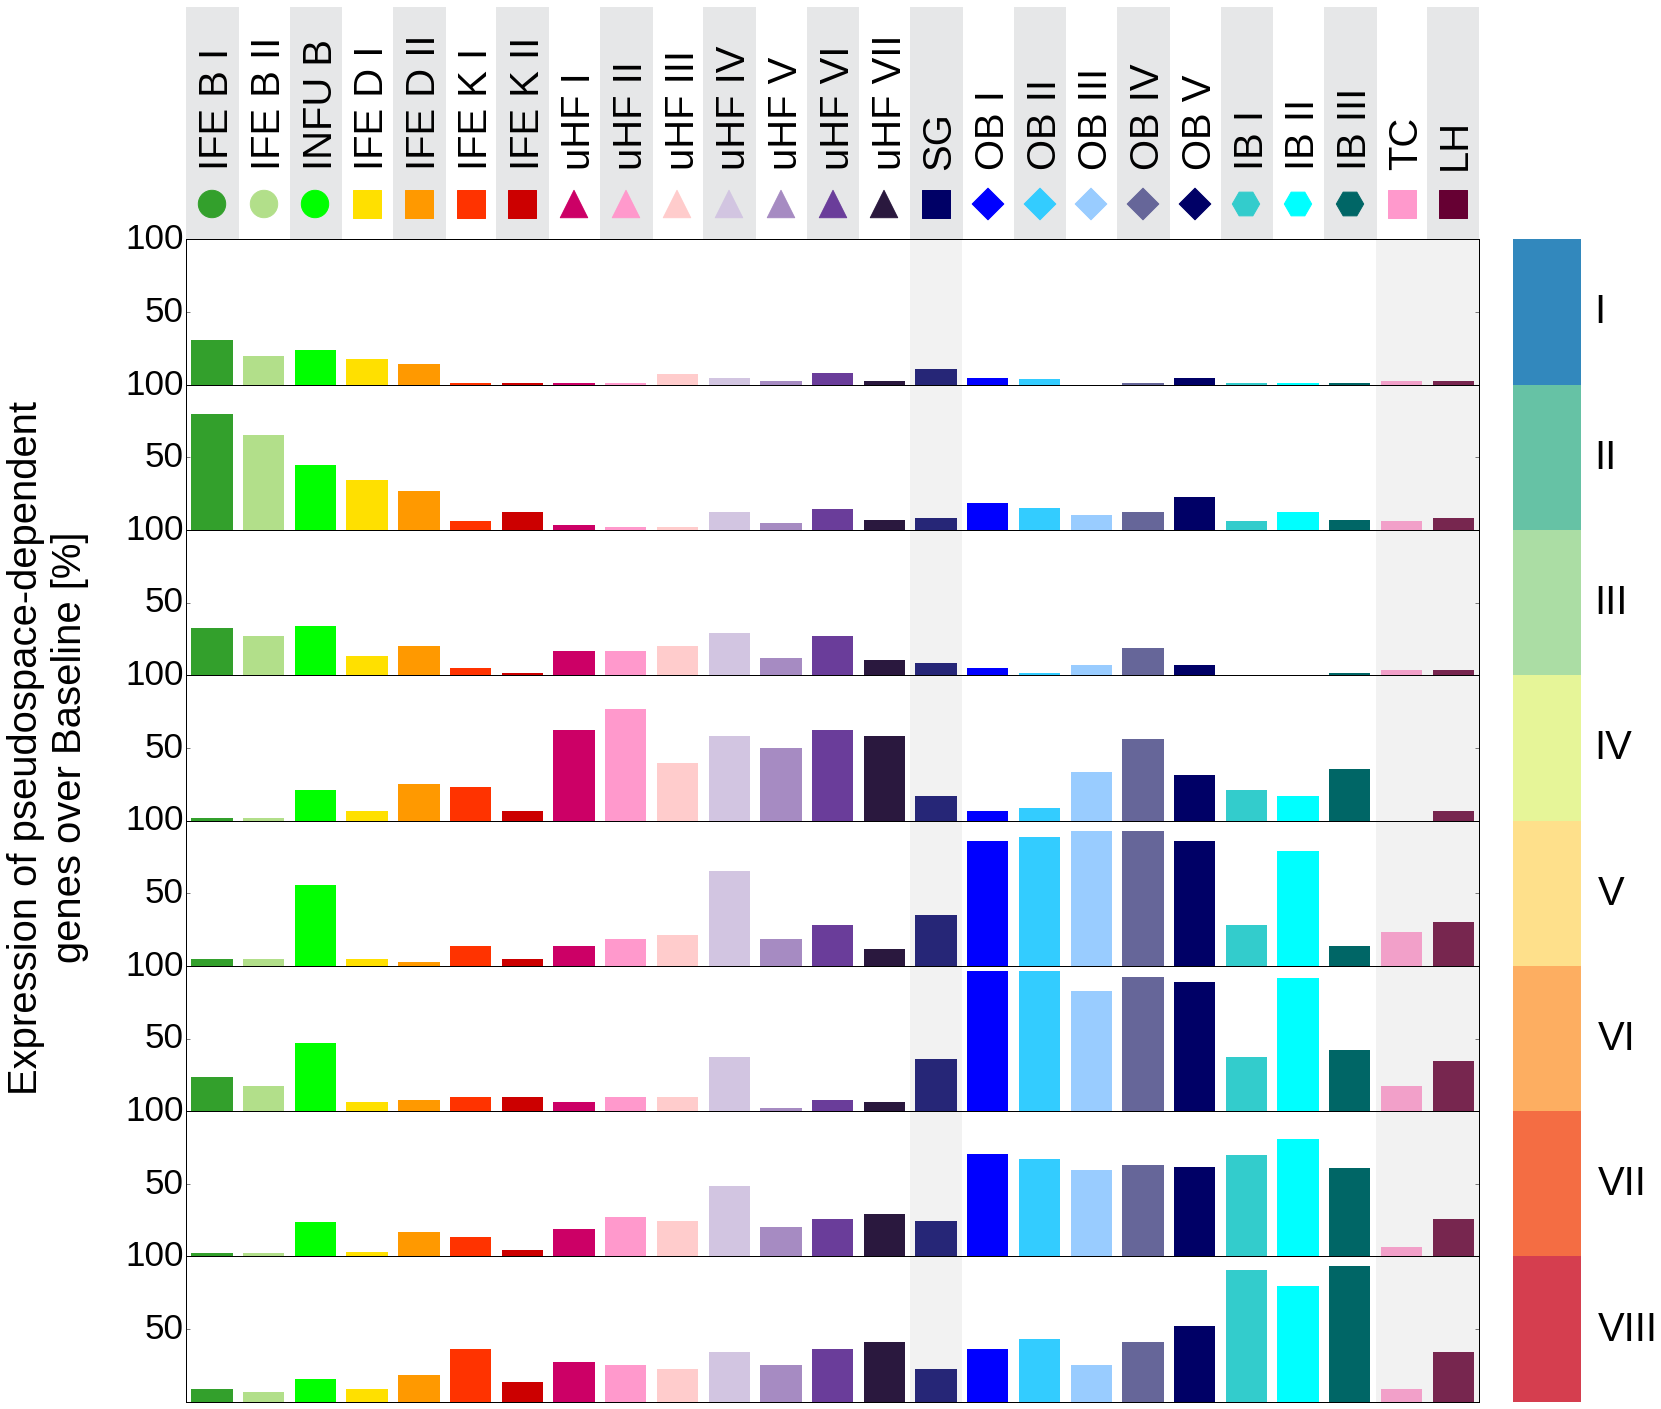

In [242]:
data = g_bin
cell_groups = s_groups_2nd
gene_groups = g_groups_spatial
exclude = [14,23,24]
cmap = cmap_g_spatial
nmap = nmap_g_spatial

#initialize figure

fig = plt.figure(facecolor = 'w', figsize = (25,25))

height_ratios = [8] + [5] * len(set(gene_groups))

gs = plt.GridSpec(len(set(gene_groups)) + 1, 2, hspace=0.0, wspace=0.05, width_ratios=[19,1], 
                  height_ratios = height_ratios)

#plot cell group names

ax = plt.subplot(gs[0, 0])
ax.set_xlim(-0.5, len(set(cell_groups))-0.5)
ax.set_ylim(0,1)

for pos, gr in enumerate(return_unique(cell_groups)):
    
    if pos % 2 == 0:
        ax.axvspan(pos-0.5,pos+0.5, 0.00, 1.0, color = '#E6E7E8', zorder = 0)
        
    ax.scatter(pos, 0.15, color = cmap_2nd[gr], s = markers_2nd_size[gr], marker = markers_2nd[gr])
    ax.text(pos + 0.1, 0.3, nmap_2nd_short[gr], family = 'Liberation Sans', fontsize = 40, 
            rotation = 'vertical', va = 'bottom', ha = 'center')
        
clean_axis(ax)

#iterate over gene groups

for pos, g_gr in enumerate(return_unique(gene_groups)):
    
    #plot barplots
        
    ax0 = plt.subplot(gs[pos + 1, 0])
    
    ax0.set_xlim(-0.5, len(set(cell_groups)) - 0.5)
    ax0.set_ylim(0, len(gene_groups[gene_groups==g_gr].index))
    
    ax0.set_xticks([])
    
    ax0.set_yticks([len(gene_groups[gene_groups==g_gr].index) * 0.5, len(gene_groups[gene_groups==g_gr].index)])
    ax0.set_yticklabels([50,100], family = 'Liberation Sans', fontsize = 35)
        
    for pos_gr, gr in enumerate(return_unique(cell_groups)):
        ax0.bar(pos_gr-0.4, g_bin.ix[g_gr, gr], color = cmap_2nd[gr], linewidth = 0)
        
    if pos == 3:
        
        ax0.yaxis.set_label_coords(-0.075, 0.5)
        ax0.set_ylabel('Expression of pseudospace-dependent\ngenes over Baseline [%]', 
                       family = 'Liberation Sans', fontsize = 40)
        
    #plot exclusion markers
    
    for pos_excl, gr in enumerate(return_unique(cell_groups)):
        
        if gr in exclude:
            
            ax0.axvspan(pos_excl - 0.5, pos_excl + 0.5, color = 'silver', alpha = 0.2, linewidth = 0)
    
    #plot color bar
    
    ax1 = plt.subplot(gs[pos + 1, 1])
    
    ax1.axhspan(0,1,0,1, color = cmap[g_gr])
    
    ax1.yaxis.set_label_position('right')
    ax1.yaxis.set_label_coords(1.25, 0.5)
    ax1.set_ylabel(nmap[g_gr], family = 'Liberation Sans', fontsize = 40, 
                   rotation = 'horizontal', ha = 'left', va = 'center')
    
    clean_axis(ax1)

figname = 'v1.8_S5_F_Spatial_genes_2nd.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Pseudotime correlation

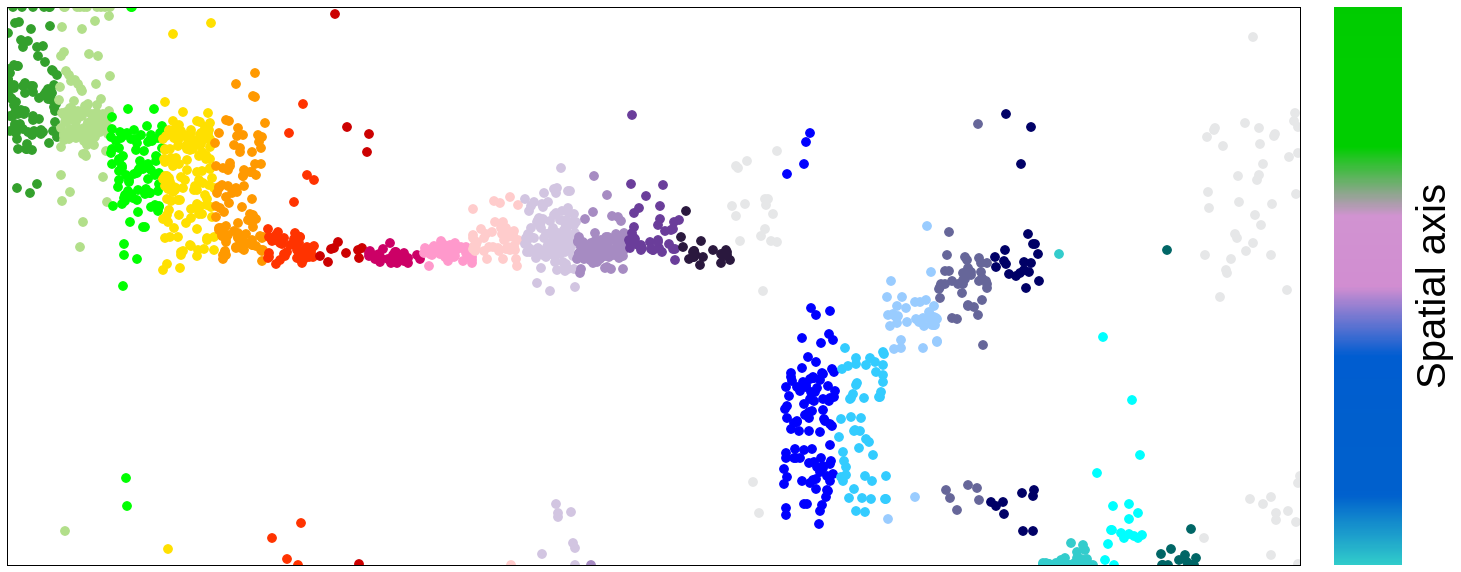

In [239]:
data = pseudospace_corr_max
cell_groups = s_groups_2nd
cmap = cmap_2nd
exclude = [14,23,24]

#initialize figure

height = 10
width = 25

fig = plt.figure(facecolor = 'w', figsize = (width, height))

gs = plt.GridSpec(1, 2, hspace = 0.05, wspace=0.05, width_ratios=[19,1])

#define axis

ax0 = fig.add_subplot(gs[0,0])

ax0.set_ylim(np.max(data),0)
ax0.set_yticks([])

ax0.set_xlim(-0.5, len(return_unique(cell_groups)) - 0.5)
ax0.set_xticks([])

#plot data

for pos, gr in enumerate(return_unique(cell_groups)):
    
    cell_ix_tmp = cell_groups[cell_groups==gr].index
    
    if gr in exclude:
        
        ax0.scatter([pos - 0.5 + np.random.random() for x in range(len(cell_ix_tmp))],
                [float(data[ix]) for ix in cell_ix_tmp],
                color = '#E6E7E8',
                s = 75)
    else:
    
        ax0.scatter([pos - 0.5 + np.random.random() for x in range(len(cell_ix_tmp))],
                    [float(data[ix]) for ix in cell_ix_tmp],
                    color = cmap[gr],
                    s = 75)

#define colorbar

ax1 = fig.add_subplot(gs[0,1])

ax1.set_xlim(0,1)
ax1.set_ylim(np.max(data),0)

ax1.set_xticks([])
ax1.set_yticks([])

for pos in np.arange(0, np.max(data)):
    
    ax1.axhspan(pos, pos + 1, color = cmap_GrVlBlCy(float(pos) / max(data.astype(float))))
    
ax1.yaxis.set_label_coords(1.2, 0.5)
ax1.set_ylabel('Spatial axis', family = 'Liberation Sans', fontsize = 40, va = 'top')

clean_axis(ax1)

figname = 'v1.8_S5_G_Spatial_correlation.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Pseudotime correlation p-value

In [225]:
pseudospace_corr, pseudospace_corr_p = PTO_correlate(log2Transform(seq), log2Transform(spatial_fitted), s_groups_2nd.index, g_groups_spatial.index, return_p=True)


Calculating binary logarithm of x + 1

Calculating binary logarithm of x + 1


In [226]:
pseudospace_corr_p_min = pseudospace_corr_p.min(axis = 1)

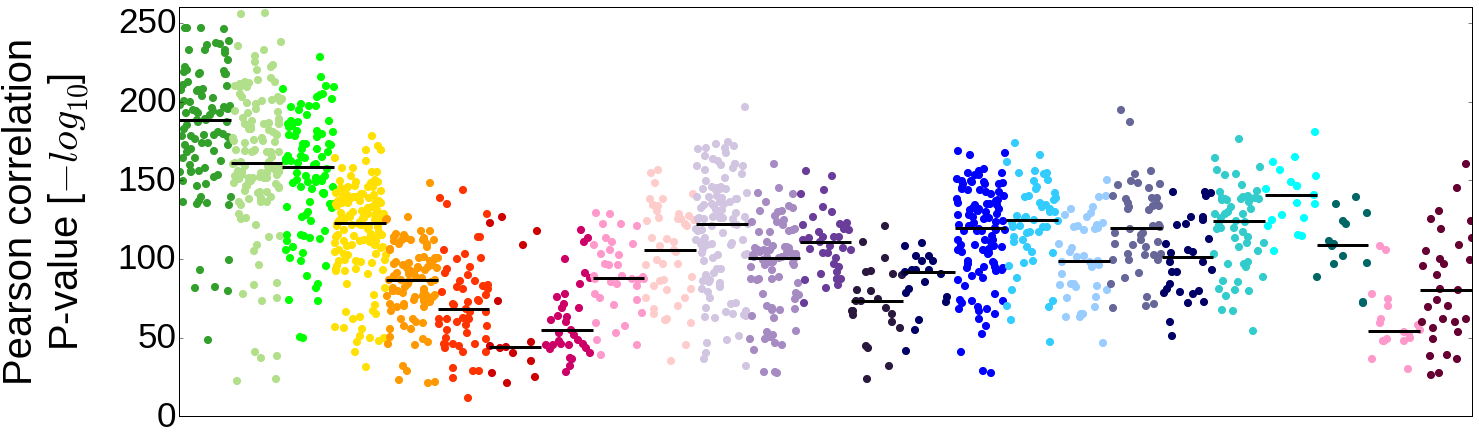

In [240]:
data = -np.log10(pseudospace_corr_p_min + 3e-324) #to prevent 0.000
cell_groups = s_groups_2nd
cmap = cmap_2nd

#initialize figure

height = 10
width = 25

fig = plt.figure(facecolor = 'w', figsize = (width, height))

gs = plt.GridSpec(2, 2, hspace = 0.0, height_ratios = [4,11], wspace=0.05, width_ratios=[19,1])

#define axis

ax0 = fig.add_subplot(gs[1,0])

ax0.set_ylim(np.max(data),0)
ax0.set_yticks([])

ax0.set_xlim(-0.5, len(return_unique(cell_groups)) - 0.5)
ax0.set_xticks([])

ax0.set_ylim(0, 260)
ax0.set_yticks([0,50,100,150,200,250])
ax0.set_yticklabels([0,50,100,150,200,250], family = 'Liberation Sans', fontsize = 35)
ax0.set_ylabel('Pearson correlation\nP-value [$-log_{10}$]', family = 'Liberation Sans', fontsize = 40, rotation = 'vertical', ha = 'center', va = 'center')
ax0.yaxis.set_label_coords(-0.1, 0.5)


#plot data

for pos, gr in enumerate(return_unique(cell_groups)):
    
    cell_ix_tmp = cell_groups[cell_groups==gr].index
    
    ax0.scatter([pos - 0.5 + np.random.random() for x in range(len(cell_ix_tmp))],
                [float(data[ix]) for ix in cell_ix_tmp],
                color = cmap[gr],
                s = 50)
    
    ax0.hlines(y =  data.ix[cell_ix_tmp].median(),
                    xmin = pos - 0.5, xmax = pos + 0.5, linewidth = 3, color = 'black')
    
    if pos % 2 == 0:
        c = '#d1d2d4'
        
    if pos % 2 == 1:
        c = '#939597'
   
figname = 'v1.8_S5_H_Spatial_correlation_p-value.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Pseudospace correlation robustness

In [37]:
spatial_corr_robustness_distance = loadData_v1(path_output, exp_id, 'spatial_corr_robustness_distance', 'DataFrame')

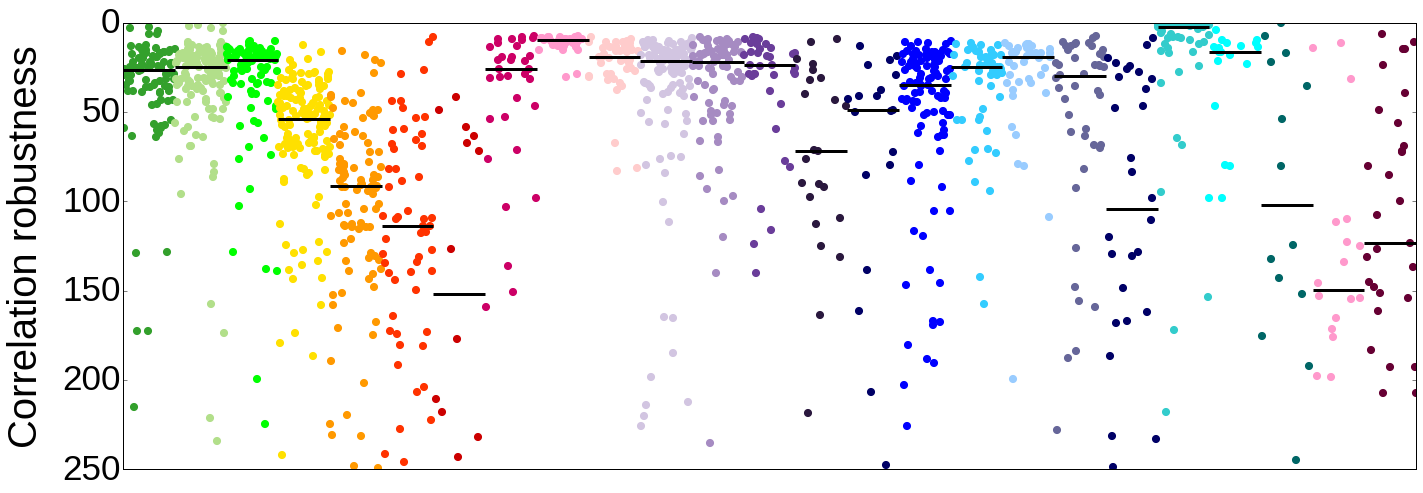

In [38]:
data = spatial_corr_robustness_distance.mean()
cell_groups = s_groups_2nd
cmap = cmap_2nd

#initialize figure

height = 8
width = 25

fig = plt.figure(facecolor = 'w', figsize = (width, height))

gs = plt.GridSpec(1, 2, hspace = 0.0, wspace=0.05, width_ratios=[19,1])
"""
#plot cell group names

ax = plt.subplot(gs[0,0])
ax.set_xlim(-0.5, len(set(cell_groups))-0.5)
ax.set_ylim(0,1)

for pos, gr in enumerate(return_unique(cell_groups)):
    
    if pos % 2 == 0:
        ax.axvspan(pos-0.5,pos+0.5, 0.005, 1.0, color = '#F4F4F4', zorder = 0)
        
    ax.scatter(pos, 0.15, color = cmap_2nd[gr], s = markers_2nd_size[gr], marker = markers_2nd[gr])
    ax.text(pos + 0.1, 0.3, nmap_2nd_short[gr], family = 'Liberation Sans', fontsize = 40, 
            rotation = 'vertical', va = 'bottom', ha = 'center')
        
clean_axis(ax)
"""
#define axis

ax0 = fig.add_subplot(gs[0,0])

ax0.set_ylim(np.max(data),0)
ax0.set_yticks([])

ax0.set_xlim(-0.5, len(return_unique(cell_groups)) - 0.5)
ax0.set_xticks([])

ax0.set_ylim(200,0)
ax0.set_yticks([0,50,100,150,200,250])
ax0.set_yticklabels([0,50,100,150,200,250], family = 'Liberation Sans', fontsize = 35)
ax0.set_ylabel('Correlation robustness', family = 'Liberation Sans', fontsize = 40, rotation = 'vertical', ha = 'center', va = 'center')
ax0.yaxis.set_label_coords(-0.075, 0.5)


#plot data

for pos, gr in enumerate(return_unique(cell_groups)):
    
    cell_ix_tmp = cell_groups[cell_groups==gr].index
    
    ax0.scatter([pos - 0.5 + np.random.random() for x in range(len(cell_ix_tmp))],
                [float(data[ix]) for ix in cell_ix_tmp],
                color = cmap[gr],
                s = 50)
    
    ax0.hlines(y =  data.ix[cell_ix_tmp].median(),
                    xmin = pos - 0.5, xmax = pos + 0.5, linewidth = 3, color = 'black')
    
    if pos % 2 == 0:
        c = '#d1d2d4'
        
    if pos % 2 == 1:
        c = '#939597'

figname = 'v1.8_S5_I_Spatial_correlation_robustness.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)